<a href="https://colab.research.google.com/github/Anjalee129/My-first-project/blob/main/Untitled35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Goodreads_Analysis") \
    .getOrCreate()


In [4]:
from google.colab import files
uploaded = files.upload()


Saving GoodReads_100k_books.csv to GoodReads_100k_books.csv


In [6]:
df_spark = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)


In [7]:
df_spark.show(5, truncate=False)


+--------------------------------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------

In [8]:
row_count = df_spark.count()
col_count = len(df_spark.columns)
print("Rows:", row_count)
print("Columns:", col_count)


Rows: 106253
Columns: 13


In [9]:
df_spark.columns


['author',
 'bookformat',
 'desc',
 'genre',
 'img',
 'isbn',
 'isbn13',
 'link',
 'pages',
 'rating',
 'reviews',
 'title',
 'totalratings']

In [10]:
# ============================================
#        BIG DATA EDA BLOCK (APACHE PYSPARK)
# ============================================

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as spark_sum

# --------------------------------------------
# 1. Spark Session
# --------------------------------------------
spark = SparkSession.builder \
    .appName("Goodreads_BigData_EDA") \
    .getOrCreate()

# --------------------------------------------
# 2. Load Dataset
# --------------------------------------------
df_spark = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)
print("✓ Dataset Loaded Successfully\n")

# --------------------------------------------
# 3. Basic Overview
# --------------------------------------------
print("===== DATASET OVERVIEW =====")

rows = df_spark.count()
cols = len(df_spark.columns)

print(f"\nShape (rows, columns): ({rows}, {cols})")
print("\nColumn Names:", df_spark.columns)

print("\n===== DATA TYPES =====")
df_spark.printSchema()

# --------------------------------------------
# 4. Null Value Analysis
# --------------------------------------------
print("\n===== NULL VALUE COUNT =====")
null_counts = df_spark.select([
    spark_sum(col(c).isNull().cast("int")).alias(c)
    for c in df_spark.columns
])
null_counts.show(truncate=False)

print("\n===== NULL VALUE PERCENTAGE =====")
null_percent = df_spark.select([
    (spark_sum(col(c).isNull().cast("int")) / rows * 100).alias(c)
    for c in df_spark.columns
])
null_percent.show(truncate=False)

# --------------------------------------------
# 5. Summary Statistics
# --------------------------------------------
print("\n===== NUMERIC SUMMARY =====")
df_spark.describe().show(truncate=False)

print("\n===== NON-NUMERIC SUMMARY =====")
string_cols = [c for (c, dtype) in df_spark.dtypes if dtype == "string"]
df_spark.select(string_cols).describe().show(truncate=False)

# --------------------------------------------
# 6. Duplicate Check
# --------------------------------------------
print("\n===== DUPLICATE CHECK =====")
duplicate_count = df_spark.count() - df_spark.dropDuplicates().count()
print("Number of duplicate rows:", duplicate_count)

# --------------------------------------------
# 7. Approx. DataFrame Size
# --------------------------------------------
print("\n===== APPROX DATAFRAME SIZE =====")
df_size_bytes = df_spark.rdd.map(lambda row: len(str(row))).sum()
print(f"Estimated Size: {df_size_bytes / (1024**2):.2f} MB")


✓ Dataset Loaded Successfully

===== DATASET OVERVIEW =====

Shape (rows, columns): (106253, 13)

Column Names: ['author', 'bookformat', 'desc', 'genre', 'img', 'isbn', 'isbn13', 'link', 'pages', 'rating', 'reviews', 'title', 'totalratings']

===== DATA TYPES =====
root
 |-- author: string (nullable = true)
 |-- bookformat: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- img: string (nullable = true)
 |-- isbn: string (nullable = true)
 |-- isbn13: string (nullable = true)
 |-- link: string (nullable = true)
 |-- pages: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- reviews: string (nullable = true)
 |-- title: string (nullable = true)
 |-- totalratings: string (nullable = true)


===== NULL VALUE COUNT =====
+------+----------+----+-----+----+-----+------+----+-----+------+-------+-----+------------+
|author|bookformat|desc|genre|img |isbn |isbn13|link|pages|rating|reviews|title|totalratings|
+------+---------

In [11]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataProject").getOrCreate()

df = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)



In [12]:
df.show(5)
df.printSchema()


+--------------------+----------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|              author|bookformat|                desc|               genre|                 img|                isbn|           isbn13|                link|               pages|              rating|             reviews|               title|        totalratings|
+--------------------+----------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Laurence M. Hauptman| Hardcover|Reveals that seve...|History,Military ...|https://i.gr-asse...|          002914180X|         9.78E+12|https://goodreads...|                   0|                3.52|                

In [13]:
# ============================================================
# 🔥 FINAL FIX: REMOVE GLYPH MISSING WARNINGS COMPLETELY
# ============================================================

import matplotlib
import matplotlib.pyplot as plt
import warnings


# 2. Switch to a universal font that actually supports ALL Unicode glyphs
plt.rcParams["font.family"] = "DejaVu Sans"

# 3. Disable all user warnings from matplotlib
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=UserWarning, module="IPython")

# 4. Disable warnings at the system level too
import logging
logging.getLogger("matplotlib").setLevel(logging.ERROR)
logging.getLogger("PIL").setLevel(logging.ERROR)


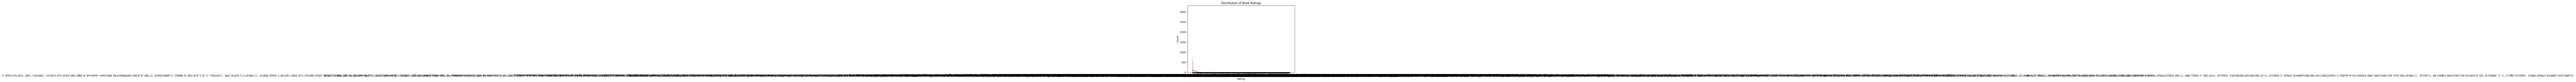

In [14]:
# --- FIX PLOTTING BACKEND (required in Colab) ---
%matplotlib inline
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")

# --- IMPORTS ---
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# --- START SPARK SESSION ---
spark = SparkSession.builder.appName("GoodReadsAnalysis").getOrCreate()

# --- LOAD DATASET ---
df = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)

# --- CONVERT 'rating' TO PANDAS ---
rating_pdf = df.select("rating").dropna().toPandas()

# --- PLOT ---
plt.figure(figsize=(8,5))
sns.histplot(rating_pdf['rating'], bins=30, kde=True, color='purple')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()



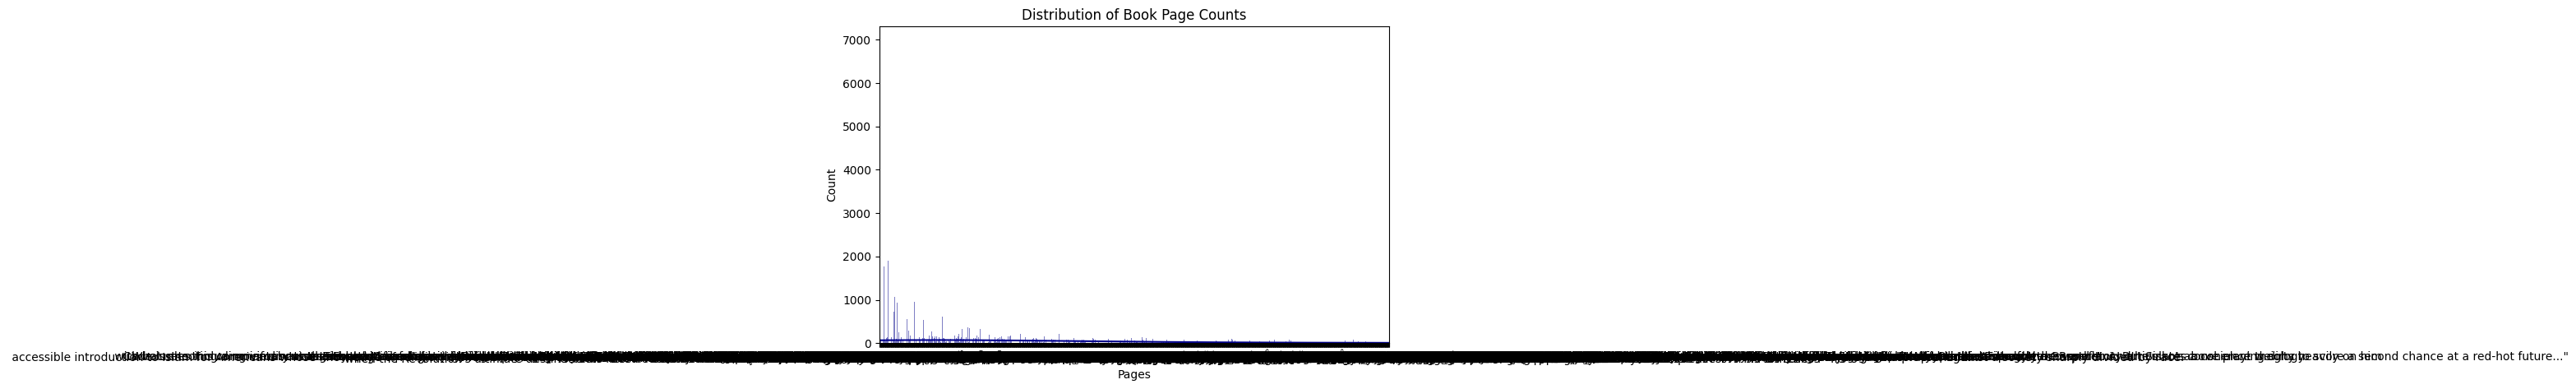

In [15]:
# --- FIX PLOTTING BACKEND ---
%matplotlib inline
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")

# --- IMPORTS ---
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# --- START SPARK ---
spark = SparkSession.builder.appName("GoodReadsAnalysis").getOrCreate()

# --- LOAD DATASET ---
df = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)

# --- CONVERT 'pages' COLUMN TO PANDAS ---
pages_pdf = df.select("pages").dropna().toPandas()

# --- PLOT ---
plt.figure(figsize=(8,5))
sns.histplot(pages_pdf['pages'], bins=50, kde=True, color='darkblue')
plt.title("Distribution of Book Page Counts")
plt.xlabel("Pages")
plt.ylabel("Count")
plt.xlim(0, 1500)   # limit extreme outliers
plt.show()


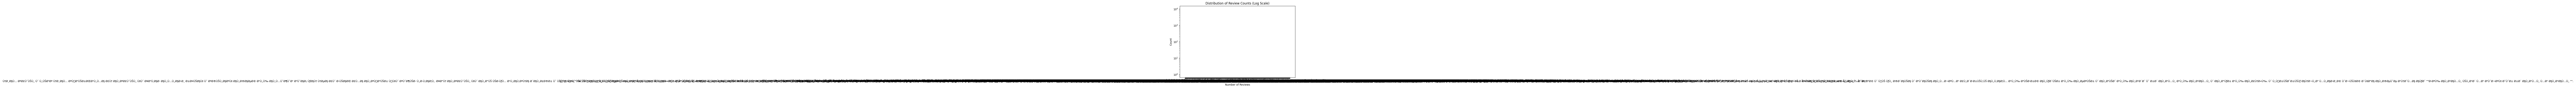

In [16]:
# --- FIX PLOTTING BACKEND ---
%matplotlib inline
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")

# --- IMPORTS ---
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# --- START SPARK ---
spark = SparkSession.builder.appName("GoodReadsAnalysis").getOrCreate()

# --- LOAD DATASET ---
df = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)

# --- CONVERT 'reviews' COLUMN TO PANDAS ---
reviews_pdf = df.select("reviews").dropna().toPandas()

# --- PLOT (LOG SCALE) ---
plt.figure(figsize=(8,5))
sns.histplot(
    reviews_pdf['reviews'],
    bins=50,
    log_scale=(False, True),   # Y-axis log scale
    color='black'
)

plt.title("Distribution of Review Counts (Log Scale)")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-858696425.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


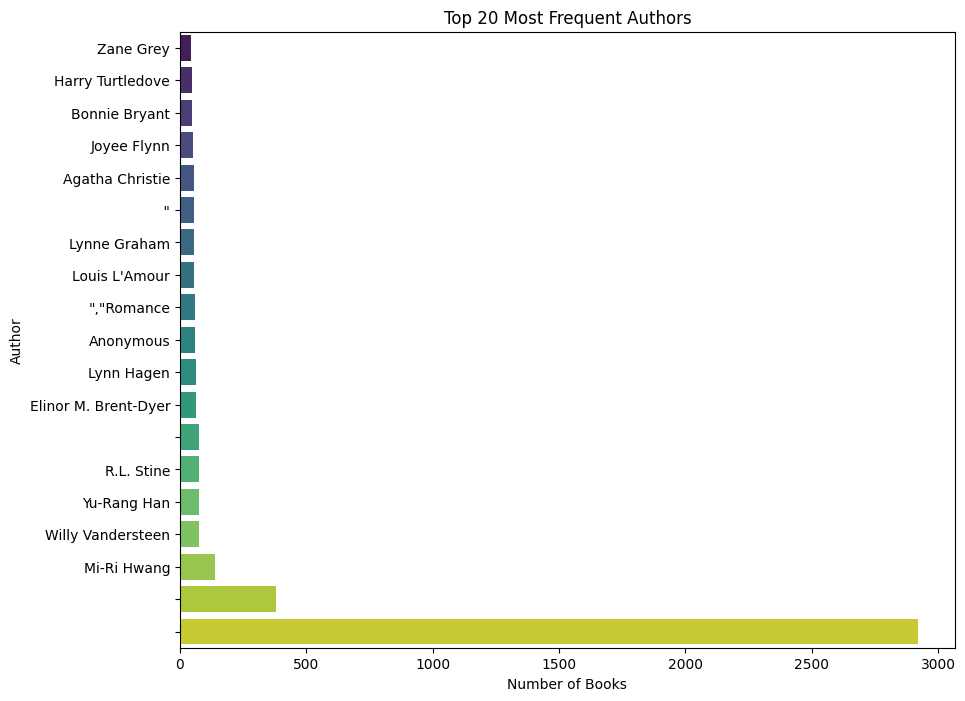

In [17]:
# --- FIX PLOTTING BACKEND ---
%matplotlib inline
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")

# --- IMPORTS ---
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# --- START SPARK ---
spark = SparkSession.builder.appName("GoodReadsAnalysis").getOrCreate()

# --- LOAD DATASET ---
df = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)

# --- STEP 1: COUNT BOOKS PER AUTHOR USING PYSPARK ---
author_counts = (
    df.groupBy("author")
      .count()
      .orderBy("count", ascending=False)
      .limit(20)
)

# --- STEP 2: CONVERT TO PANDAS ---
author_pdf = author_counts.toPandas()

# Sort for nicer horizontal bar order
author_pdf = author_pdf.sort_values("count", ascending=True)

# --- STEP 3: PLOT ---
plt.figure(figsize=(10,8))
sns.barplot(
    x=author_pdf["count"],
    y=author_pdf["author"],
    palette="viridis"
)

plt.title("Top 20 Most Frequent Authors")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.show()


/tmp/ipython-input-4090052387.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


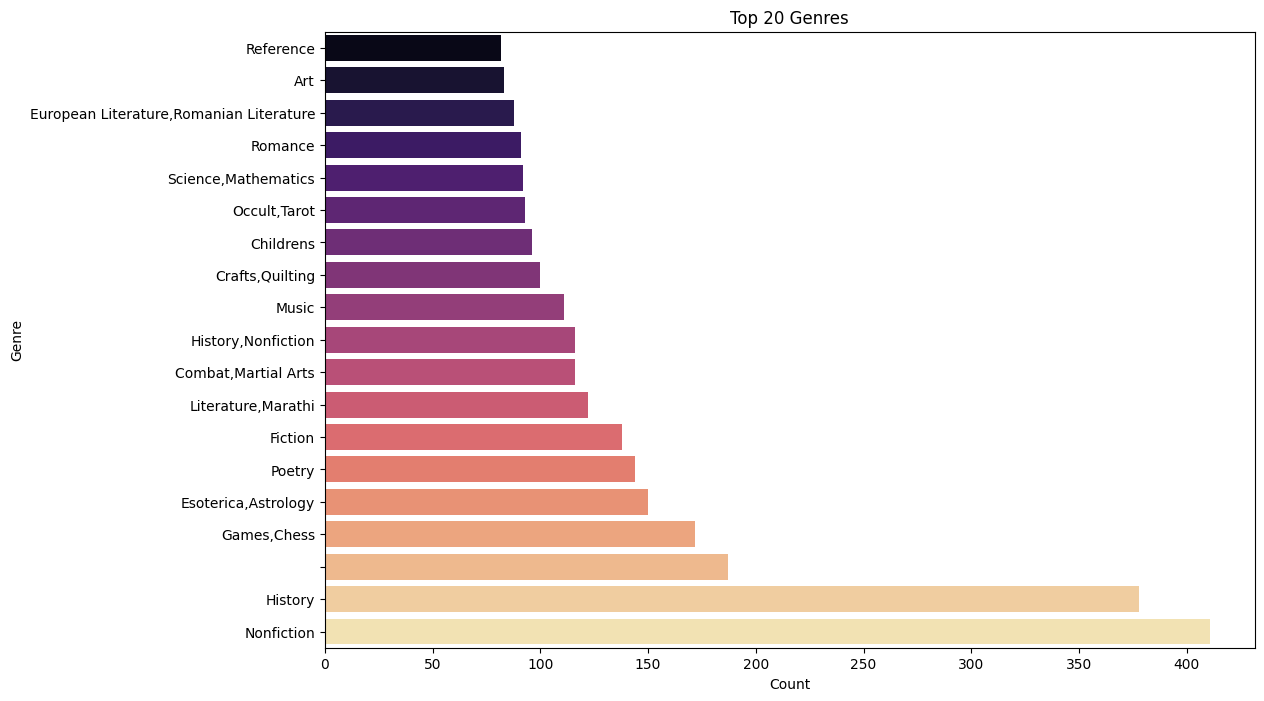

In [18]:
# --- FIX PLOTTING BACKEND ---
%matplotlib inline
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")

# --- IMPORTS ---
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# --- START SPARK ---
spark = SparkSession.builder.appName("GoodReadsAnalysis").getOrCreate()

# --- LOAD DATASET ---
df = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)

# --- STEP 1: COUNT GENRES ---
genre_counts = (
    df.groupBy("genre")
      .count()
      .orderBy("count", ascending=False)
      .limit(20)
)

# --- STEP 2: CONVERT TO PANDAS ---
genre_pdf = genre_counts.toPandas()

# Sort ascending for clean horizontal bar layering
genre_pdf = genre_pdf.sort_values("count", ascending=True)

# --- STEP 3: PLOT ---
plt.figure(figsize=(12,8))
sns.barplot(
    x=genre_pdf["count"],
    y=genre_pdf["genre"],
    palette="magma"
)

plt.title("Top 20 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


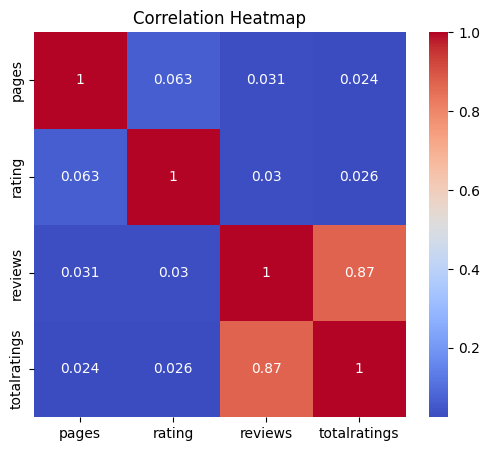

In [19]:
from pyspark.sql import functions as F

numeric_cols = ["pages", "rating", "reviews", "totalratings"]

# Cast numeric columns
df2 = df.select([F.col(c).cast("double").alias(c) for c in numeric_cols]).dropna()

# Convert to pandas
pdf = df2.toPandas()

# Correlation heatmap
corr = pdf.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [20]:
# numeric columns
numeric_cols = ["pages", "rating", "reviews", "totalratings"]

# Spark describe() for selected numeric columns
summary_df = df.describe(numeric_cols)

summary_df.show(truncate=False)


+-------+----------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
from pyspark.sql import functions as F
import numpy as np
from scipy import stats

numeric_cols = ["pages", "rating", "reviews", "totalratings"]

# --- Cast numeric columns properly ---
df_numeric = df.select([F.col(c).cast("double").alias(c) for c in numeric_cols])

# --- Convert to pandas ---
pdf_numeric = df_numeric.dropna().toPandas()

# --- Z-score based outlier detection ---
z_scores = np.abs(stats.zscore(pdf_numeric))
outliers = (z_scores > 3).sum(axis=0)

outliers


array([ 182, 1473,  444,  284])

In [23]:
df.groupBy("author").count().orderBy(F.desc("count")).show(10)
df.groupBy("bookformat").count().orderBy(F.desc("count")).show(10)
df.groupBy("genre").count().orderBy(F.desc("count")).show(10)


+--------------------+-----+
|              author|count|
+--------------------+-----+
|                    | 2920|
|                NULL| 1768|
|                    |  380|
|         Mi-Ri Hwang|  137|
|   Willy Vandersteen|   76|
|          R.L. Stine|   75|
|         Yu-Rang Han|   75|
|                    |   74|
|Elinor M. Brent-Dyer|   63|
|          Lynn Hagen|   62|
+--------------------+-----+
only showing top 10 rows

+--------------------+-----+
|          bookformat|count|
+--------------------+-----+
|           Paperback|53849|
|           Hardcover|27574|
|               ebook| 5327|
|                NULL| 4728|
|      Kindle Edition| 4568|
|Mass Market Paper...| 3023|
|     Unknown Binding|  449|
|                Nook|  395|
|            Audio CD|  318|
|          Board Book|  164|
+--------------------+-----+
only showing top 10 rows

+-------------------+-----+
|              genre|count|
+-------------------+-----+
|               NULL|14443|
|         Nonfiction|  4

In [26]:
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+------+----------+----+-----+----+-----+------+----+-----+------+-------+-----+------------+
|author|bookformat|desc|genre| img| isbn|isbn13|link|pages|rating|reviews|title|totalratings|
+------+----------+----+-----+----+-----+------+----+-----+------+-------+-----+------------+
|  1768|      4728|9892|14443|8394|18264| 15871|6185| 6230|  6291|   6339| 6443|        6600|
+------+----------+----+-----+----+-----+------+----+-----+------+-------+-----+------------+



In [27]:
df.filter((F.col("rating") < 0) | (F.col("rating") > 5)).show()
df.filter(F.col("pages") <= 0).show()
df.filter((F.col("reviews") > 0) & (F.col("totalratings") == 0)).show()
df.filter(F.length("desc") < 10).show()


+--------------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------+--------------------+--------------------+
|              author| bookformat|                desc|               genre|                 img|                isbn|              isbn13|                link|               pages|    rating| reviews|               title|        totalratings|
+--------------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------+--------------------+--------------------+
|Charlotte Fiell,E...|  Paperback|"Fashion Sourcebo...| French & German....|Couture,Fashion,H...|https://i.gr-asse...|          1906863482|            9.78E+12|https://goodreads...|       576|    4.51|                   6|Fashion Sourceboo...|
|Brian G. Hedges,D...|  

📌 Using file: GoodReads_100k_books.csv
✅ Spark Data Loaded
+--------------------+----------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|              author|bookformat|                desc|               genre|                 img|                isbn|           isbn13|                link|               pages|              rating|             reviews|               title|        totalratings|
+--------------------+----------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Laurence M. Hauptman| Hardcover|Reveals that seve...|History,Military ...|https://i.gr-asse...|          002914180X|         9.78E+12|https://goodreads...

/tmp/ipython-input-1303730243.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_mean.values, y=genre_mean.index, palette="magma")
/tmp/ipython-input-1303730243.py:63: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1303730243.py:63: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1303730243.py:63: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1303730243.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


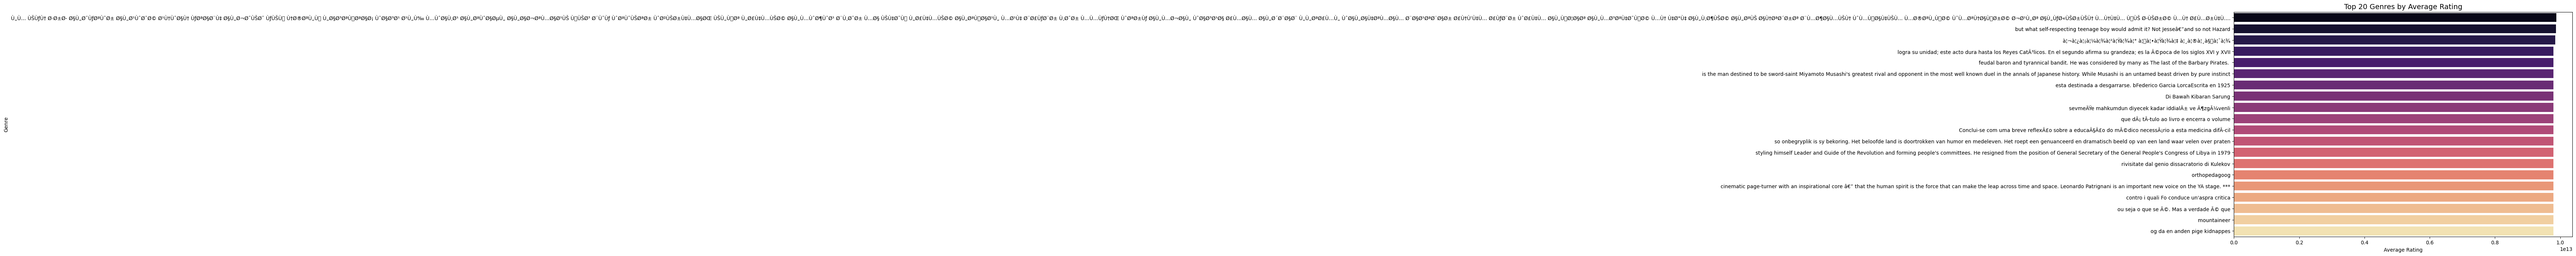

In [28]:
# -------------------------------------------------
# 1. UPLOAD + AUTO-DETECT FILE
# -------------------------------------------------
import os
from google.colab import files

# Upload if no CSV exists in directory
if not any(f.endswith(".csv") for f in os.listdir()):
    print("⚠️ No CSV found. Please upload your Goodreads dataset.")
    uploaded = files.upload()

# Detect the CSV filename automatically
csv_name = [f for f in os.listdir() if f.lower().endswith(".csv")][0]
print(f"📌 Using file: {csv_name}")

# -------------------------------------------------
# 2. START SPARK + LOAD DATA
# -------------------------------------------------
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("GoodReadsAnalysis").getOrCreate()

df = spark.read.csv(csv_name, header=True, inferSchema=True)
print("✅ Spark Data Loaded")
df.show(5)

# -------------------------------------------------
# 3. CLEAN RATING + GENRE
# -------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert only the needed columns
pdf2 = df.select("genre", "rating").toPandas()

# Clean rating -> numeric
pdf2["rating"] = pd.to_numeric(pdf2["rating"], errors="coerce")
pdf2 = pdf2.dropna(subset=["rating"])

# Clean genre -> remove symbols that break matplotlib
pdf2["genre"] = pdf2["genre"].astype(str)
pdf2["genre"] = pdf2["genre"].str.replace(r'[$#%&{}_"]', '', regex=True)

# -------------------------------------------------
# 4. COMPUTE GENRE MEAN RATING
# -------------------------------------------------
genre_mean = (
    pdf2.groupby("genre", observed=True)["rating"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

# -------------------------------------------------
# 5. PLOT
# -------------------------------------------------
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_mean.values, y=genre_mean.index, palette="magma")

plt.title("Top 20 Genres by Average Rating", fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()



/tmp/ipython-input-859030811.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


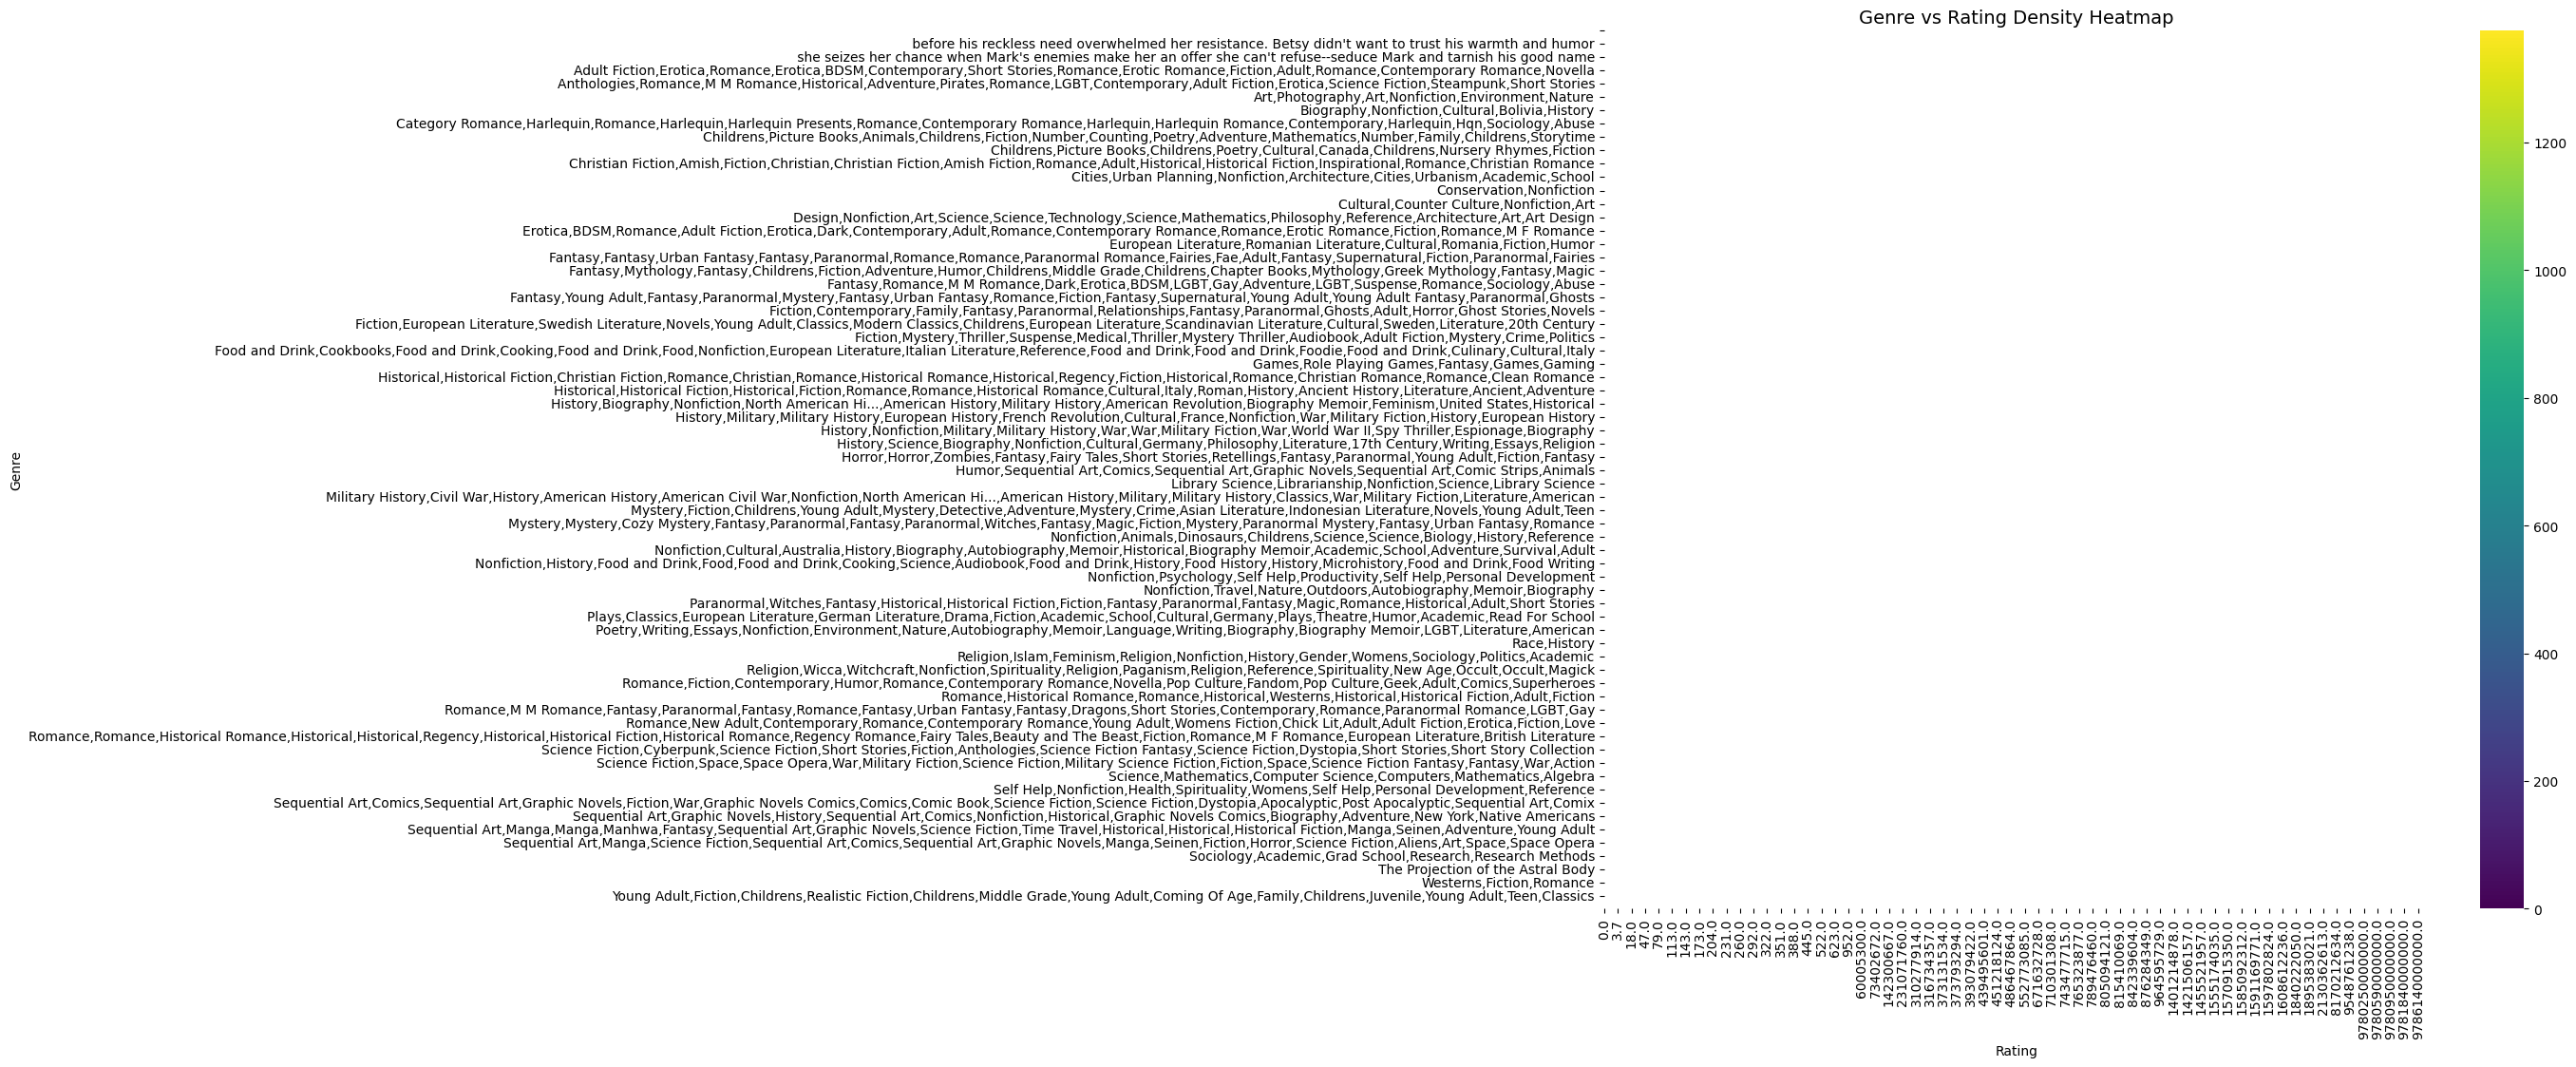

In [29]:
# Create a pivot table: genre vs rounded rating
pdf2["rounded_rating"] = pdf2["rating"].round(1)

heat = pdf2.pivot_table(
    index="genre",
    columns="rounded_rating",
    values="rating",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(14, 12))
sns.heatmap(
    heat,
    cmap="viridis",
    linewidths=0.3
)

plt.title("Genre vs Rating Density Heatmap", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


In [30]:
# --- CLEAN GENRE-WISE ANALYSIS WITHOUT ERRORS ---

import pyspark.sql.functions as F

# 1. Select only needed columns
df_genre = df.select("genre", "rating", "reviews", "pages", "totalratings")

# 2. Remove rows where rating cannot be converted to float
df_genre = df_genre.filter(df_genre["rating"].cast("float").isNotNull())

# 3. Compute aggregates per genre
genre_stats = (
    df_genre.groupBy("genre")
    .agg(
        F.count("*").alias("book_count"),
        F.round(F.avg("rating"), 2).alias("avg_rating"),
        F.expr("percentile(reviews, 0.5)").alias("median_reviews"),
        F.expr("percentile(totalratings, 0.5)").alias("median_totalratings")
    )
    .orderBy(F.desc("book_count"))
)

genre_stats.show(20, truncate=False)


+----------------------------------------+----------+-----------------+--------------+-------------------+
|genre                                   |book_count|avg_rating       |median_reviews|median_totalratings|
+----------------------------------------+----------+-----------------+--------------+-------------------+
|NULL                                    |9267      |3.16636313988E9  |0.0           |4.0                |
|Nonfiction                              |403       |775829.72        |2.0           |15.0               |
|History                                 |369       |4.08             |1.0           |11.0               |
|Games,Chess                             |172       |4.06             |1.0           |10.0               |
|Esoterica,Astrology                     |150       |4.1              |1.0           |10.0               |
|Poetry                                  |144       |4.01             |2.0           |19.0               |
|Fiction                             

In [31]:
# -------------------------------------------------
#  MASTER SETUP BLOCK – run this ONCE
# -------------------------------------------------

import os
import pandas as pd
from pyspark.sql import SparkSession

# 1. Start or attach Spark
spark = SparkSession.builder.appName("GoodReadsAnalysis").getOrCreate()

# 2. Auto-detect CSV
csv_files = [f for f in os.listdir() if f.lower().endswith(".csv")]
if not csv_files:
    from google.colab import files
    print("No CSV found — please upload your Goodreads dataset.")
    uploaded = files.upload()
    csv_files = [f for f in os.listdir() if f.lower().endswith(".csv")]

csv_name = csv_files[0]
print(f"📌 Using file: {csv_name}")

# 3. Load Spark DataFrame
df = spark.read.csv(csv_name, header=True, inferSchema=True)

# 4. Convert to pandas and clean numeric text
pdf_full = df.toPandas()

# Clean ratings and other numerics globally (optional but safe)
for col in ["rating", "pages", "reviews", "totalratings"]:
    if col in pdf_full.columns:
        pdf_full[col] = pd.to_numeric(pdf_full[col], errors="coerce")

print("✅ Setup complete — df and pdf_full are now ready to use.")
print(pdf_full.head())


📌 Using file: GoodReads_100k_books.csv
✅ Setup complete — df and pdf_full are now ready to use.
                             author bookformat  \
0              Laurence M. Hauptman  Hardcover   
1  Charlotte Fiell,Emmanuelle Dirix  Paperback   
2                     Andy Anderson  Paperback   
3              Carlotta R. Anderson  Hardcover   
4                     Jean Leveille       None   

                                                desc  \
0  Reveals that several hundred thousand Indians ...   
1  "Fashion Sourcebook - 1920s is the first book ...   
2  The seminal history and analysis of the Hungar...   
3  """All-American Anarchist"" chronicles the lif...   
4  Aujourdâ€™hui, lâ€™oiseau nous invite Ã  sa ta...   

                                               genre  \
0  History,Military History,Civil War,American Hi...   
1   French & German. Also Available: Fashion Sour...   
2                                   Politics,History   
3   Detroit's prominent labor organizer an

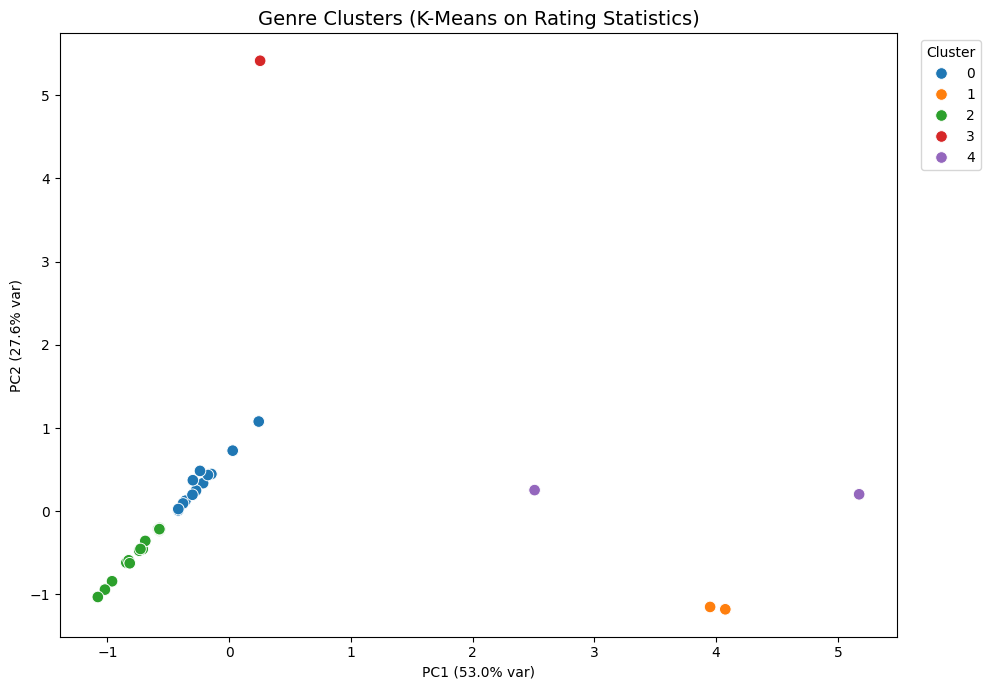

mean           std  median  \
genre                                                                         
Alcohol,Wine                             3.920806e+00  6.575695e-01   4.000   
Art                                      4.019390e+00  7.909868e-01   4.200   
Asian Literature,Turkish Literature      3.741481e+00  3.502151e-01   3.780   
Childrens                                3.898791e+00  4.346719e-01   3.890   
Combat,Martial Arts                      4.023362e+00  3.414342e-01   4.000   
Crafts,Origami                           3.723077e+00  1.087202e+00   4.000   
Crafts,Quilting                          4.013900e+00  5.960508e-01   4.085   
Crafts,Sewing                            4.013333e+00  6.314892e-01   4.070   
Esoterica,Astrology                      4.104333e+00  4.187700e-01   4.140   
European Literature,Czech Literature     3.650536e+00  4.545024e-01   3.690   
European Literature,Romanian Literature  3.876250e+00  3.942994e-01   3.900   
Fantasy                                  3.776800e+00  6.870120e-01   3.920   
Fiction                                  7.700787e+10  8.678347e+11   3.700   
Food and Drink,Cookbooks                 3.719615e+00  4.678150e-01   3.815   
Games,Chess                              4.064826e+00  4.478284e-01   4.060   
Games,Gamebooks                          3.832333e+00  3.816128e-01   3.845   
Historical,Georgian                      4.124638e+00  4.797413e-01   4.230   
History                                  4.083171e+00  5.569902e+00   3.860   
History,Nonfiction                       3.821983e+00  3.540283e-01   3.795   
Literature,Marathi                       3.974672e+00  2.691560e-01   4.005   

                                         count  cluster       PC1       PC2  
genre                                                                        
Alcohol,Wine                                62        2 -0.573645 -0.231005  
Art                                         82        2 -0.962156 -0.841120  
Asian Literature,Turkish Literature         54        0 -0.146140  0.447851  
Childrens                                   91        0 -0.359555  0.126641  
Combat,Martial Arts                        116        2 -0.573093 -0.201193  
Crafts,Origami                              65        2 -0.573614 -0.229349  
Crafts,Quilting                            100        2 -0.738461 -0.474018  
Crafts,Sewing                               51        2 -0.709807 -0.454483  
Esoterica,Astrology                        150        2 -0.844847 -0.617233  
European Literature,Czech Literature        56        0  0.028803  0.728476  
European Literature,Romanian Literature     88        0 -0.379022  0.093927  
Fantasy                                     50        0 -0.418281  0.010833  
Fiction                                    127        4  2.508444  0.254313  
Food and Drink,Cookbooks                    52        0 -0.214185  0.338045  
Games,Chess                                172        2 -0.689137 -0.356625  
Games,Gamebooks                             60        0 -0.272411  0.249288  
Historical,Georgian                         69        2 -1.020596 -0.941471  
History                                    369        0 -0.298411  0.373288  
History,Nonfiction                         116        0 -0.174660  0.435492  
Literature,Marathi                         122        2 -0.582750 -0.213410

In [32]:
# -------------------------------------------------
# K-MEANS CLUSTERING OF GENRES BASED ON RATINGS
# -------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Extract genre–rating table ---
pdf_gr = pdf_full[['genre', 'rating']].copy()

# ensure genre as string
pdf_gr['genre'] = pdf_gr['genre'].astype(str)

# convert rating to numeric, drop invalid
pdf_gr['rating'] = pd.to_numeric(pdf_gr['rating'], errors='coerce')
pdf_gr = pdf_gr.dropna(subset=['genre', 'rating'])

# --- 2. Aggregate rating distribution features per genre ---
genre_stats = (
    pdf_gr.groupby('genre')['rating']
    .agg(['mean', 'std', 'median', 'count'])
    .fillna(0)
)

# Optional: drop very small genres (too noisy)
genre_stats = genre_stats[genre_stats['count'] >= 50]

# --- 3. Standardize ---
X = genre_stats[['mean', 'std', 'median', 'count']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. K-Means ---
k = 5   # you can adjust number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

genre_stats['cluster'] = clusters

# --- 5. PCA for visualization ---
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
genre_stats['PC1'] = pcs[:, 0]
genre_stats['PC2'] = pcs[:, 1]

# --- 6. Plot ---
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=genre_stats,
    x='PC1', y='PC2',
    hue='cluster',
    palette='tab10',
    s=70
)

plt.title("Genre Clusters (K-Means on Rating Statistics)", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Show first few clustered genres
genre_stats.head(20)


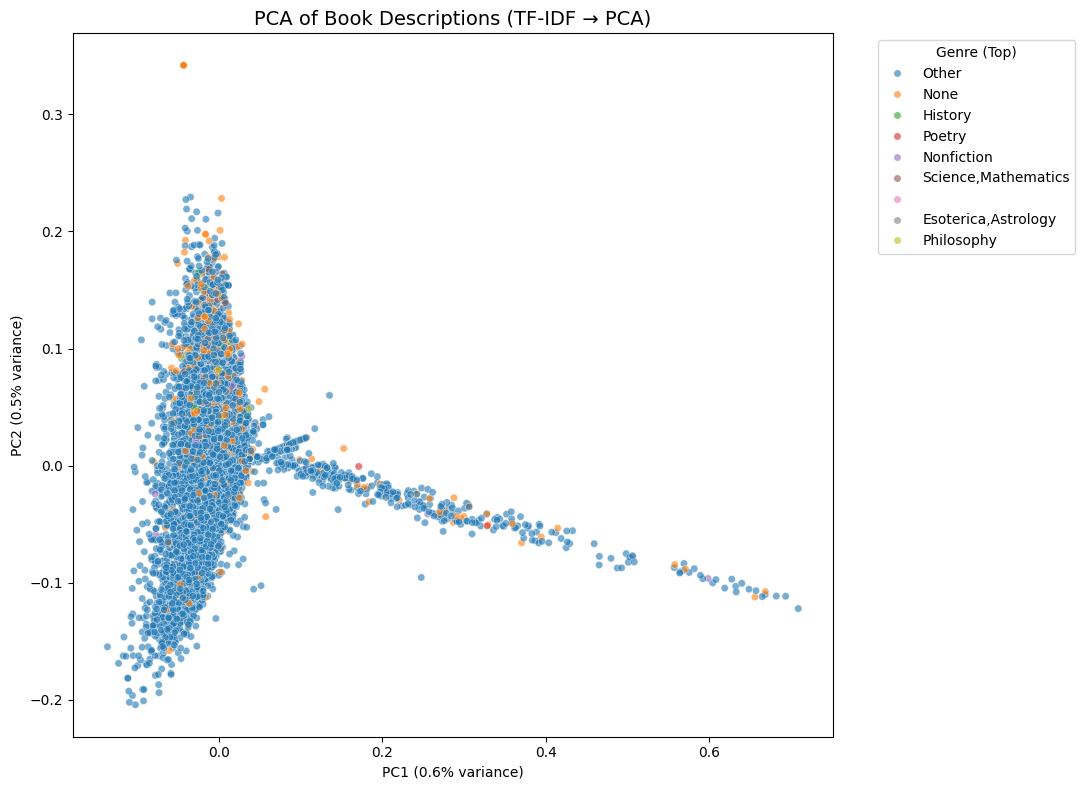

In [33]:
# -------------------------------------------------
# PCA ON TEXTUAL FEATURES (BOOK DESCRIPTIONS)
# -------------------------------------------------

# -------------------------------------------------
# PCA ON BOOK DESCRIPTIONS (TF-IDF → PCA → 2D PLOT)
# -------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# --- extract description + genre ---
pdf_desc = pdf_full[['genre', 'desc']].copy()
pdf_desc = pdf_desc.dropna(subset=['desc'])
pdf_desc['genre'] = pdf_desc['genre'].astype(str)
pdf_desc['desc'] = pdf_desc['desc'].astype(str)

# --- sample if too large ---
if len(pdf_desc) > 6000:
    pdf_desc = pdf_desc.sample(6000, random_state=42)

# --- TF-IDF ---
tfidf = TfidfVectorizer(
    max_features=4000,
    stop_words='english',
    min_df=5
)
X_tfidf = tfidf.fit_transform(pdf_desc['desc'])

# --- PCA ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

pdf_desc['PC1'] = X_pca[:, 0]
pdf_desc['PC2'] = X_pca[:, 1]

# --- simplify genre labels ---
top_genres = pdf_desc['genre'].value_counts().nlargest(8).index
pdf_desc['genre_simplified'] = np.where(
    pdf_desc['genre'].isin(top_genres),
    pdf_desc['genre'],
    'Other'
)

# --- plot ---
plt.figure(figsize=(11, 8))
sns.scatterplot(
    data=pdf_desc,
    x='PC1',
    y='PC2',
    hue='genre_simplified',
    palette='tab10',
    alpha=0.6,
    s=28
)

plt.title("PCA of Book Descriptions (TF-IDF → PCA)", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(
    title="Genre (Top)",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()



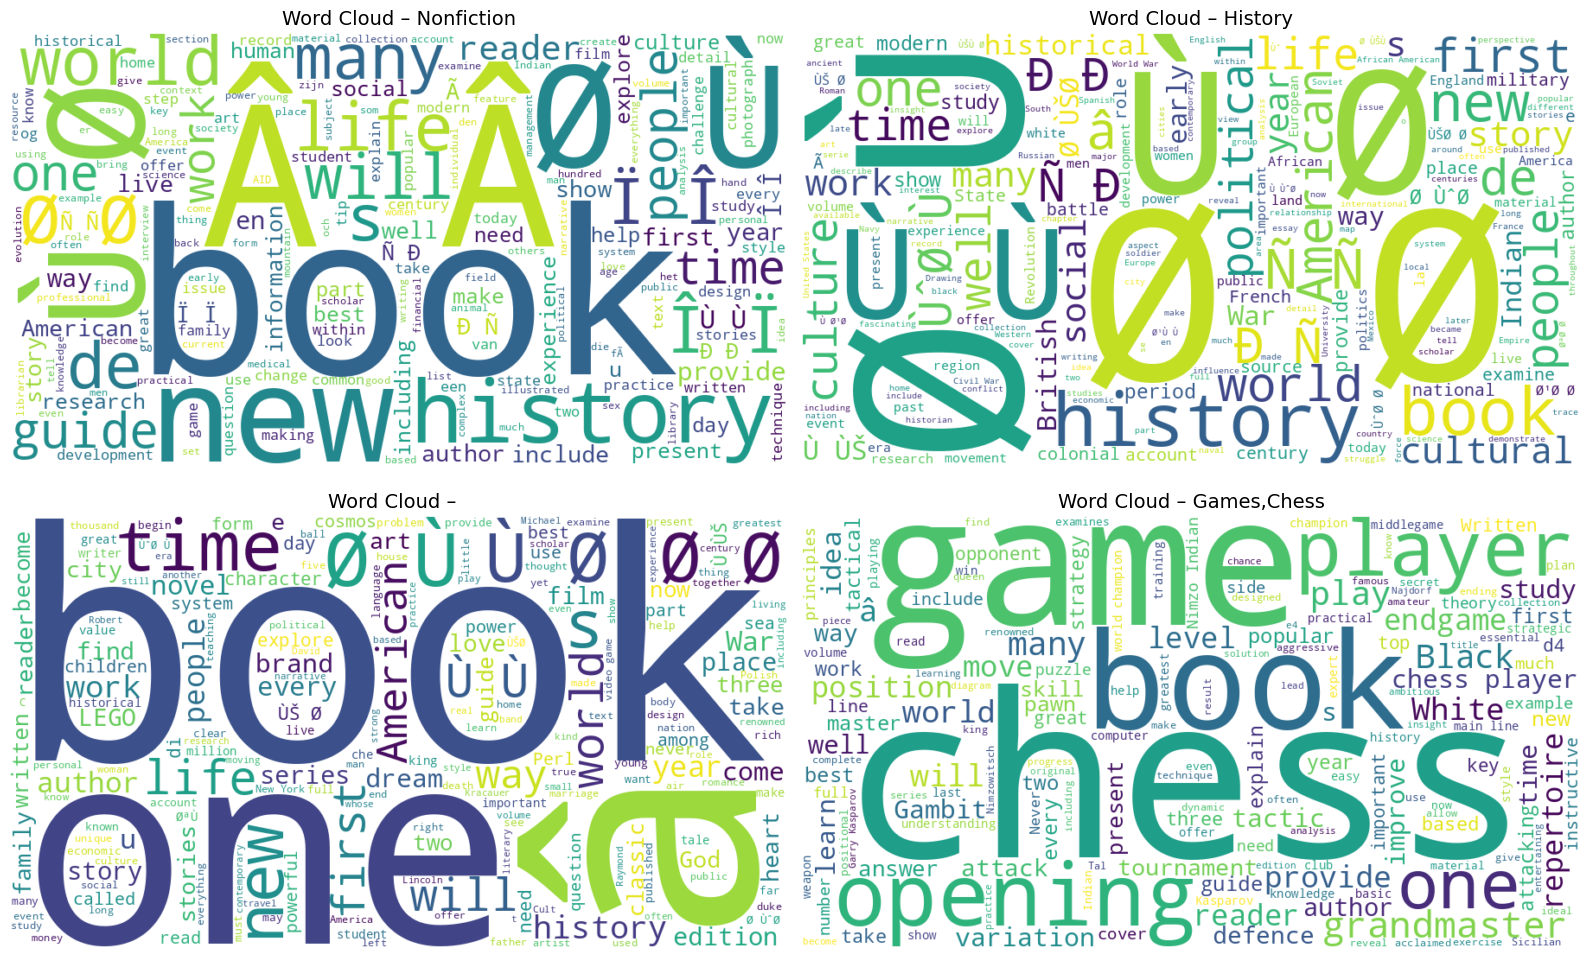

In [34]:
# -------------------------------------------------
# WORD CLOUDS PER GENRE (Top 4 Genres)
# -------------------------------------------------

!pip install wordcloud > /dev/null

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- 1. Extract needed columns ---
pdf_wc = pdf_full[['genre', 'desc']].copy()
pdf_wc = pdf_wc.dropna(subset=['genre', 'desc'])

# convert to str to avoid errors
pdf_wc['genre'] = pdf_wc['genre'].astype(str)
pdf_wc['desc'] = pdf_wc['desc'].astype(str)

# --- 2. Identify top 4 genres ---
top_genres = pdf_wc['genre'].value_counts().nlargest(4).index

plt.figure(figsize=(16, 10))

# --- 3. Generate word cloud per genre ---
for i, g in enumerate(top_genres, start=1):

    # collect all descriptions for this genre
    text = " ".join(pdf_wc.loc[pdf_wc['genre'] == g, 'desc'])

    # clean weird characters (prevents matplotlib/wordcloud crashes)
    text = text.replace("$", "").replace("{", "").replace("}", "").replace("%", "")

    wc = WordCloud(
        width=900,
        height=500,
        background_color='white',
        max_words=200,
        collocations=True,
        min_font_size=10
    ).generate(text)

    # plot
    plt.subplot(2, 2, i)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud – {g}", fontsize=14)

plt.tight_layout()
plt.show()


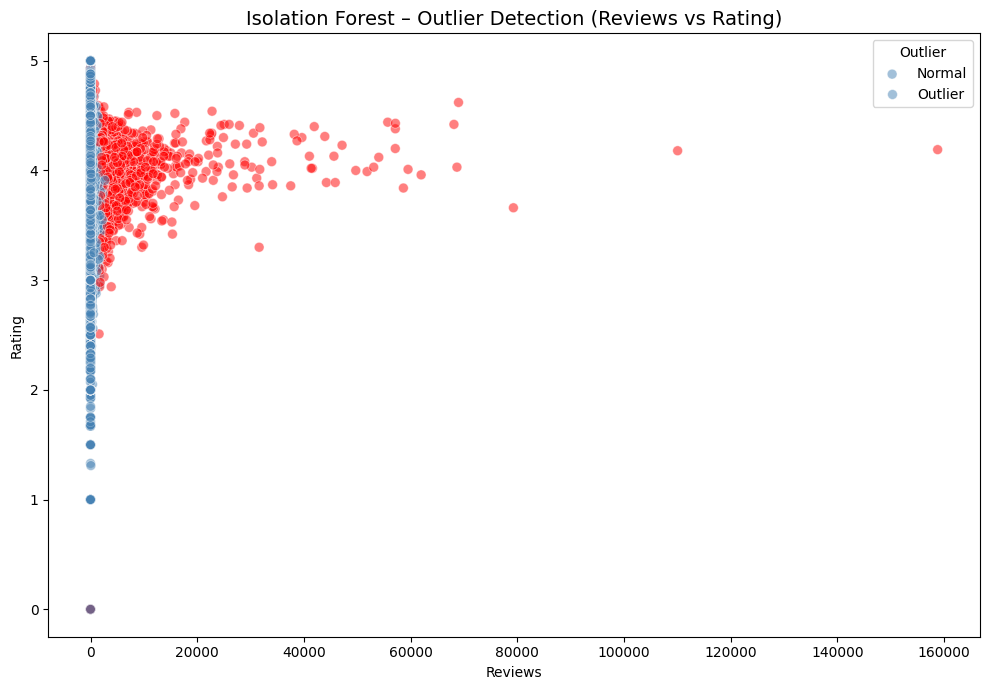

pages  reviews  totalratings  rating  is_outlier
72   2184.0   1414.0       14293.0    4.40        True
142  1400.0      0.0           1.0    5.00        True
181   498.0  25060.0      476789.0    4.42        True
267   274.0   1362.0       20406.0    4.56        True
272   323.0  20157.0      199905.0    4.08        True
290   688.0    427.0       27016.0    3.97        True
323   596.0   1771.0       65021.0    4.07        True
448   527.0   2505.0       79019.0    3.97        True
459   294.0   3284.0       33438.0    3.16        True
560   335.0  15917.0      160843.0    4.04        True

In [35]:
# -------------------------------------------------
# ISOLATION FOREST OUTLIER DETECTION
# -------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Extract numeric columns ---
num_cols = ["pages", "reviews", "totalratings", "rating"]

pdf_num = pdf_full[num_cols].copy()

# --- 2. Convert all numeric fields safely ---
for c in num_cols:
    pdf_num[c] = pd.to_numeric(pdf_num[c], errors="coerce")

# drop rows with missing numerics
pdf_num = pdf_num.dropna()

# --- 3. Fit Isolation Forest ---
iso = IsolationForest(
    contamination=0.02,   # ~2% outliers (tunable)
    random_state=42
)

iso_labels = iso.fit_predict(pdf_num)

# mark outliers
pdf_num["is_outlier"] = (iso_labels == -1)

# --- 4. Scatter plot: Reviews vs Rating (highlight outliers) ---
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pdf_num,
    x="reviews",
    y="rating",
    hue="is_outlier",
    palette={False: "steelblue", True: "red"},
    alpha=0.5,
    s=50
)

plt.title("Isolation Forest – Outlier Detection (Reviews vs Rating)", fontsize=14)
plt.xlabel("Reviews")
plt.ylabel("Rating")
plt.legend(title="Outlier", labels=["Normal", "Outlier"])
plt.tight_layout()
plt.show()

# Optional: view the top outliers
pdf_num[pdf_num["is_outlier"]].head(10)


Data Preprocessing and Analysis

In [36]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("GoodReads").getOrCreate()
df = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)


In [37]:
cols_needed = [
    "title", "author", "genre", "desc", "pages", "rating", "reviews",
    "totalratings", "img", "link", "isbn", "isbn13"
]

df = df.select(*cols_needed)


In [38]:
import pandas as pd
import numpy as np

pdf = df.toPandas()


In [39]:
pdf['genre'] = pdf['genre'].fillna("Unknown")
pdf['desc'] = pdf['desc'].fillna("No description provided")

if 'title' in pdf.columns:
    pdf['title'] = pdf['title'].fillna("Untitled")


In [40]:
pdf['genre'] = (
    pdf['genre']
    .astype(str)
    .apply(lambda x: ",".join([g.strip().title() for g in x.split(",")]))
)

pdf['main_genre'] = pdf['genre'].apply(
    lambda x: x.split(",")[0] if x != "Unknown" else "Unknown"
)


In [41]:
pdf['desc_length'] = pdf['desc'].astype(str).apply(len)
pdf['title_length'] = pdf['title'].astype(str).apply(len)


In [42]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import types as T
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# ---------------------------------------------------------
# START SPARK
# ---------------------------------------------------------
spark = SparkSession.builder.appName("GoodReads-BigData").getOrCreate()

# ---------------------------------------------------------
# LOAD DATA
# ---------------------------------------------------------
df = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)

# ---------------------------------------------------------
# 1. Missing value handling
# ---------------------------------------------------------
df = df.fillna({
    "genre": "Unknown",
    "desc": "No description provided"
})

# Handle missing title correctly
if "title" in df.columns:
    df = df.withColumn(
        "title",
        F.when(F.col("title").isNull(), "Untitled").otherwise(F.col("title"))
    )
else:
    df = df.withColumn("title", F.substring(F.col("desc"), 1, 30))


# ---------------------------------------------------------
# 2. Clean & standardize genre
# ---------------------------------------------------------
clean_genre_udf = F.udf(
    lambda x: ",".join([g.strip().title() for g in x.split(",")]) if x else "Unknown",
    T.StringType()
)

df = df.withColumn("genre", clean_genre_udf(F.col("genre")))

df = df.withColumn(
    "main_genre",
    F.when(F.col("genre") == "Unknown", "Unknown")
     .otherwise(F.split(F.col("genre"), ",").getItem(0))
)


# ---------------------------------------------------------
# 3. Convert numeric columns (reviews, totalratings, rating)
# ---------------------------------------------------------
num_cols = ["reviews", "totalratings", "rating", "pages"]
for c in num_cols:
    df = df.withColumn(c, F.col(c).cast("double"))

df = df.dropna(subset=["reviews", "totalratings", "rating"])


# ---------------------------------------------------------
# 4. Text features
# ---------------------------------------------------------
df = df.withColumn("desc_length", F.length(F.col("desc")))


# ---------------------------------------------------------
# 5. Log-transform skewed numerical features
# ---------------------------------------------------------
df = df.withColumn("log_reviews", F.log1p(F.col("reviews")))
df = df.withColumn("log_totalratings", F.log1p(F.col("totalratings")))


# ---------------------------------------------------------
# 6. Reduce genres to Top 20
# ---------------------------------------------------------
top20_genres = [
    r["main_genre"]
    for r in df.groupBy("main_genre")
               .count()
               .orderBy(F.desc("count"))
               .limit(20)
               .collect()
]

df = df.withColumn(
    "main_genre_simplified",
    F.when(F.col("main_genre").isin(top20_genres), F.col("main_genre"))
     .otherwise(F.lit("Other"))
)


# ---------------------------------------------------------
# 7. Drop irrelevant text or ID columns
# ---------------------------------------------------------
to_drop = ["img", "link", "isbn", "isbn13", "author", "desc", "genre", "main_genre"]
df = df.drop(*[c for c in to_drop if c in df.columns])


# ---------------------------------------------------------
# 8. One-Hot Encode main_genre_simplified (Spark ML)
# ---------------------------------------------------------
indexer = StringIndexer(
    inputCol="main_genre_simplified",
    outputCol="genre_index",
    handleInvalid="keep"
)

df = indexer.fit(df).transform(df)

encoder = OneHotEncoder(
    inputCol="genre_index",
    outputCol="genre_ohe"
)

df = encoder.fit(df).transform(df)


# ---------------------------------------------------------
# 9. Assemble final feature vector (ML-ready)
# ---------------------------------------------------------

feature_cols = [
    "pages", "reviews", "totalratings", "rating",
    "desc_length", "log_reviews", "log_totalratings",
    "genre_ohe"  # vector column
]

assembler = VectorAssembler(
    inputCols=[c for c in feature_cols if c != "genre_ohe"] + ["genre_ohe"],
    outputCol="features"
)

df_model = assembler.transform(df)

# ---------------------------------------------------------
# FINAL OUTPUT
# ---------------------------------------------------------
df_model.select("features", "rating").show(5, truncate=False)

print("Final dataset ready for ML!")




+---------------------------------------------------------------------------------------------+------+
|features                                                                                     |rating|
+---------------------------------------------------------------------------------------------+------+
|(28,[1,2,3,4,5,6,13],[5.0,33.0,3.52,192.0,1.791759469228055,3.5263605246161616,1.0])         |3.52  |
|(28,[0,1,2,3,4,5,6,7],[124.0,2.0,26.0,4.15,187.0,1.0986122886681096,3.295836866004329,1.0])  |4.15  |
|(28,[0,1,2,3,4,5,6,8],[177.0,1.0,1.0,4.0,527.0,0.6931471805599453,0.6931471805599453,1.0])   |4.0   |
|(28,[0,1,2,3,4,5,6,7],[368.0,7.0,119.0,3.73,1234.0,2.0794415416798357,4.787491742782046,1.0])|3.73  |
|(28,[0,1,2,3,4,5,6,8],[160.0,2.0,3.0,5.0,1157.0,1.0986122886681096,1.3862943611198906,1.0])  |5.0   |
+---------------------------------------------------------------------------------------------+------+
only showing top 5 rows

Final dataset ready for ML!


In [44]:
# ===========================================================
# 0. IMPORTS
# ===========================================================
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, length, log1p, when
from pyspark.ml.feature import (
    StringIndexer, OneHotEncoder, VectorAssembler
)
from pyspark.ml.regression import (
    LinearRegression, RandomForestRegressor, GBTRegressor
)
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline


# ===========================================================
# 1. START SPARK + LOAD
# ===========================================================
spark = SparkSession.builder.appName("GoodReads-Final-ML").getOrCreate()

df = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=False)

print("Loaded rows:", df.count())
print("Columns:", df.columns)


# ===========================================================
# 2. CLEANING + BASIC REQUIRED FIXES
# ===========================================================
df = df.fillna({
    "genre": "Unknown",
    "desc": "No description provided",
    "title": "Untitled"
})

if "title" not in df.columns:
    df = df.withColumn("title", col("desc"))

# Description length
df = df.withColumn("desc_length", length(col("desc")))


# ===========================================================
# 3. ENSURE NUMERIC COLUMNS ARE NUMERIC
# ===========================================================
numeric_cast_cols = ["pages", "reviews", "totalratings"]

for c in numeric_cast_cols:
    df = df.withColumn(c, col(c).cast("float"))

# Log transforms
df = df.withColumn("log_reviews", log1p(col("reviews")))
df = df.withColumn("log_totalratings", log1p(col("totalratings")))


# ===========================================================
# 4. GENRE PROCESSING
# ===========================================================
df = df.withColumn(
    "main_genre",
    when(col("genre") != "Unknown", col("genre")).otherwise("Unknown")
)

# Top 20 genre buckets
top_genres = (
    df.groupBy("main_genre").count()
      .orderBy(col("count").desc())
      .limit(20)
      .toPandas()["main_genre"]
      .tolist()
)

df = df.withColumn(
    "main_genre_simplified",
    when(col("main_genre").isin(top_genres), col("main_genre"))
        .otherwise("Other")
)


# ===========================================================
# 5. SAFELY REMOVE TEXT COLUMNS (BUT KEEP RATING + GENRE)
# ===========================================================
# ⭐ Protect rating first
df = df.withColumn("rating", col("rating").cast("float"))
df = df.dropna(subset=["rating"])

# Drop all string columns except the genre column used for ML
string_cols = [
    c for c, t in df.dtypes
    if t == "string" and c not in ["main_genre_simplified"]
]

df_model = df.drop(*string_cols)


# ===========================================================
# 6. FIX: REPLACE NULLS IN ALL NUMERIC FEATURES
# ===========================================================
assembler_numeric = [
    "pages", "reviews", "totalratings",
    "desc_length", "log_reviews", "log_totalratings"
]

for c in assembler_numeric:
    df_model = df_model.withColumn(
        c,
        when(col(c).isNull(), 0.0).otherwise(col(c))
    )


# ===========================================================
# 7. PIPELINE (Indexer → OHE → Assembler)
# ===========================================================
indexer = StringIndexer(
    inputCol="main_genre_simplified",
    outputCol="genre_index",
    handleInvalid="keep"
)

encoder = OneHotEncoder(
    inputCols=["genre_index"],
    outputCols=["genre_ohe"]
)

assembler = VectorAssembler(
    inputCols=assembler_numeric + ["genre_ohe"],
    outputCol="features",
    handleInvalid="skip"    # ⭐ Extra protection
)

pipeline = Pipeline(stages=[indexer, encoder, assembler])


# ===========================================================
# 8. SPLIT + TRANSFORM
# ===========================================================
train_df, test_df = df_model.randomSplit([0.8, 0.2], seed=42)

pipeline_model = pipeline.fit(train_df)

train_ready = pipeline_model.transform(train_df)
test_ready = pipeline_model.transform(test_df)


# ===========================================================
# 9. TRAIN 3 MODELS
# ===========================================================
lr = LinearRegression(featuresCol="features", labelCol="rating")
rf = RandomForestRegressor(featuresCol="features", labelCol="rating", numTrees=200)
gb = GBTRegressor(featuresCol="features", labelCol="rating", maxIter=100)

lr_model = lr.fit(train_ready)
rf_model = rf.fit(train_ready)
gb_model = gb.fit(train_ready)


# ===========================================================
# 10. PREDICT
# ===========================================================
pred_lr = lr_model.transform(test_ready)
pred_rf = rf_model.transform(test_ready)
pred_gb = gb_model.transform(test_ready)


# ===========================================================
# 11. EVALUATE (RMSE / MAE / R²)
# ===========================================================
eval_rmse = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="rmse")
eval_mae  = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="mae")
eval_r2   = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="r2")

def evaluate(model_name, pred_df):
    print(f"\n====== {model_name} ======")
    print("RMSE:", eval_rmse.evaluate(pred_df))
    print("MAE :", eval_mae.evaluate(pred_df))
    print("R²  :", eval_r2.evaluate(pred_df))

evaluate("Linear Regression", pred_lr)
evaluate("Random Forest", pred_rf)
evaluate("Gradient Boosting", pred_gb)



Loaded rows: 106253
Columns: ['author', 'bookformat', 'desc', 'genre', 'img', 'isbn', 'isbn13', 'link', 'pages', 'rating', 'reviews', 'title', 'totalratings']

====== Linear Regression ======
RMSE: 866007475942.9525
MAE : 217783259237.2271
R²  : 0.3257723654674989

====== Random Forest ======
RMSE: 332613583109.0293
MAE : 40585797395.742424
R²  : 0.9005411969949405

====== Gradient Boosting ======
RMSE: 309724047572.18665
MAE : 26685958363.536842
R²  : 0.9137591320105731


Loaded rows: 106253
Columns: ['author', 'bookformat', 'desc', 'genre', 'img', 'isbn', 'isbn13', 'link', 'pages', 'rating', 'reviews', 'title', 'totalratings']
               Model      RMSE       MAE        R2
0  Linear Regression  0.568324  0.351189  0.169885
1      Random Forest  0.510295  0.329979  0.330750
2  Gradient Boosting  0.374390  0.273688  0.639757

Top Features:
              feature  importance
5   log_totalratings    0.398818
2       totalratings    0.389101
1            reviews    0.067650
4        log_reviews    0.047348
7            genre_1    0.037551
0              pages    0.025262
3        desc_length    0.009104
6            genre_0    0.008502
13           genre_7    0.003740
8            genre_2    0.003142
18          genre_12    0.002399
22          genre_16    0.002007
10           genre_4    0.001725
24          genre_18    0.000527
11           genre_5    0.000496


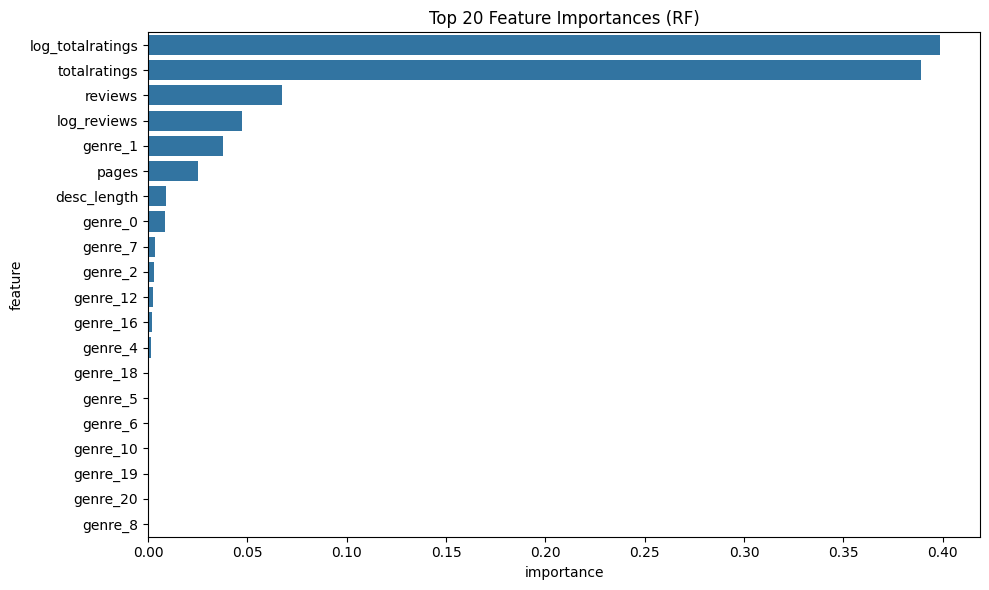

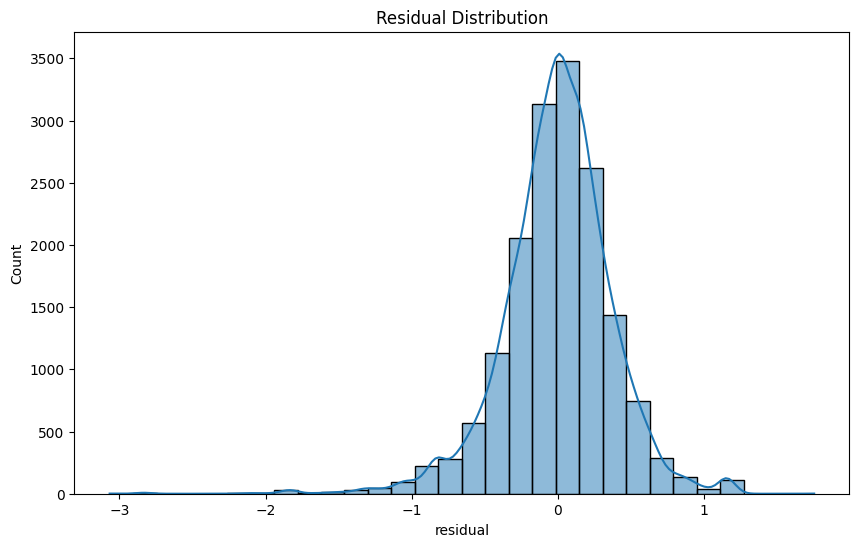

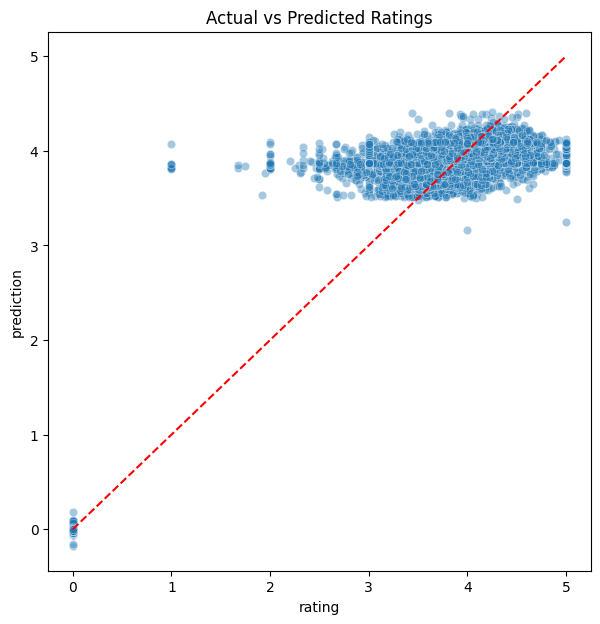

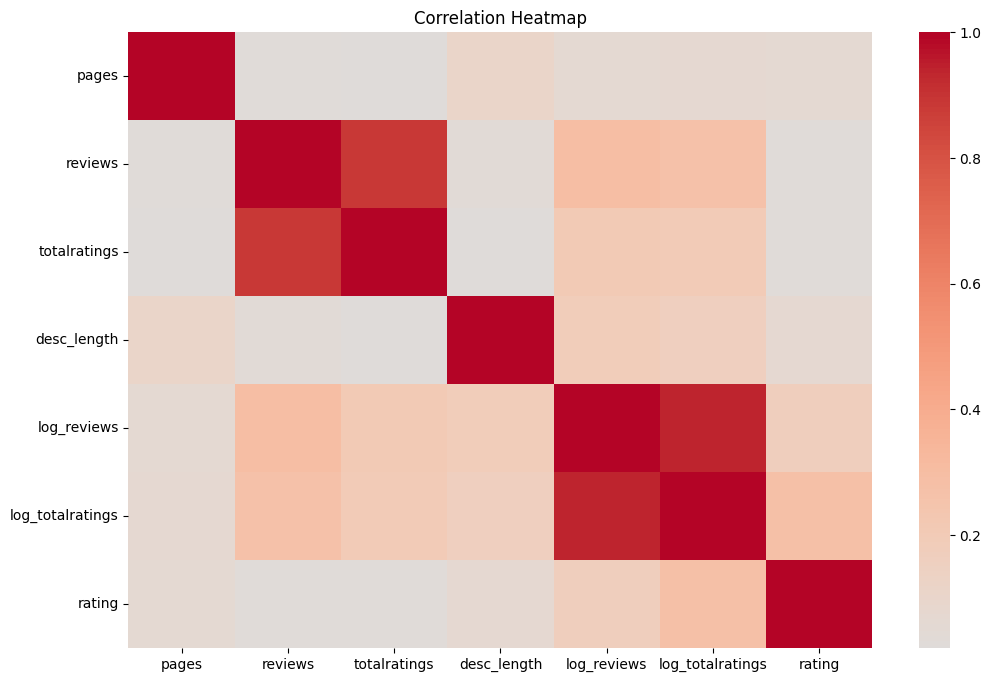

In [45]:
# ===========================================================
# 0. IMPORTS
# ===========================================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.ml.feature import (
    StringIndexer, OneHotEncoder,
    VectorAssembler
)

from pyspark.ml.regression import (
    LinearRegression, RandomForestRegressor, GBTRegressor
)

from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline


# ===========================================================
# 1. START SPARK + LOAD DATASET
# ===========================================================
spark = SparkSession.builder.appName("GoodReadsML").getOrCreate()

df = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)
print("Loaded rows:", df.count())
print("Columns:", df.columns)


# ===========================================================
# 2. CLEANING
# ===========================================================

df = df.fillna({
    "genre": "Unknown",
    "desc": "No description provided",
    "title": "Untitled"
})

# Clean whitespace
df = df.withColumn("genre", trim(col("genre")))
df = df.withColumn("title", trim(col("title")))
df = df.withColumn("desc", trim(col("desc")))

# Main genre = first split
df = df.withColumn(
    "main_genre",
    when(col("genre") != "Unknown", split(col("genre"), ",")[0]).otherwise("Unknown")
)


# ===========================================================
# 3. FEATURE ENGINEERING
# ===========================================================

# Text length
df = df.withColumn("desc_length", length(col("desc")))

# Ensure numeric columns
df = df.withColumn("pages", col("pages").cast("float"))
df = df.withColumn("reviews", col("reviews").cast("float"))
df = df.withColumn("totalratings", col("totalratings").cast("float"))
df = df.withColumn("rating", col("rating").cast("float"))

# Log transforms
df = df.withColumn("log_reviews", log1p(col("reviews")))
df = df.withColumn("log_totalratings", log1p(col("totalratings")))

# Reduce genre categories (top 20)
top_genres = (
    df.groupBy("main_genre").count().orderBy(col("count").desc()).limit(20)
).toPandas()["main_genre"].tolist()

df = df.withColumn(
    "main_genre_simplified",
    when(col("main_genre").isin(top_genres), col("main_genre")).otherwise("Other")
)


# ===========================================================
# 4. SELECT MODEL FEATURES
# ===========================================================
model_cols = [
    "pages", "reviews", "totalratings",
    "desc_length", "log_reviews", "log_totalratings",
    "main_genre_simplified", "rating"
]

df_model = df.select(model_cols)

# Drop all rows with nulls
df_model = df_model.na.drop()


# ===========================================================
# 5. PIPELINE: INDEX → ONE-HOT → ASSEMBLE
# ===========================================================

indexer = StringIndexer(
    inputCol="main_genre_simplified",
    outputCol="genre_index",
    handleInvalid="keep"
)

encoder = OneHotEncoder(
    inputCols=["genre_index"],
    outputCols=["genre_ohe"]
)

assembler = VectorAssembler(
    inputCols=[
        "pages", "reviews", "totalratings",
        "desc_length", "log_reviews", "log_totalratings",
        "genre_ohe"
    ],
    outputCol="features",
    handleInvalid="skip"
)

pipeline = Pipeline(stages=[indexer, encoder, assembler])

pipeline_model = pipeline.fit(df_model)
df_ready = pipeline_model.transform(df_model)


# ===========================================================
# 6. TRAIN-TEST SPLIT
# ===========================================================
train_df, test_df = df_ready.randomSplit([0.8, 0.2], seed=42)


# ===========================================================
# 7. TRAIN MODELS
# ===========================================================

lr = LinearRegression(featuresCol="features", labelCol="rating")
rf = RandomForestRegressor(featuresCol="features", labelCol="rating", numTrees=200)
gb = GBTRegressor(featuresCol="features", labelCol="rating")

lr_model = lr.fit(train_df)
rf_model = rf.fit(train_df)
gb_model = gb.fit(train_df)


# ===========================================================
# 8. PREDICT
# ===========================================================
pred_lr = lr_model.transform(test_df)
pred_rf = rf_model.transform(test_df)
pred_gb = gb_model.transform(test_df)


# ===========================================================
# 9. EVALUATION
# ===========================================================
eval_rmse = RegressionEvaluator(labelCol="rating", metricName="rmse")
eval_mae = RegressionEvaluator(labelCol="rating", metricName="mae")
eval_r2 = RegressionEvaluator(labelCol="rating", metricName="r2")

def evaluate(name, pred):
    return [
        name,
        eval_rmse.evaluate(pred),
        eval_mae.evaluate(pred),
        eval_r2.evaluate(pred)
    ]

results = [
    evaluate("Linear Regression", pred_lr),
    evaluate("Random Forest", pred_rf),
    evaluate("Gradient Boosting", pred_gb)
]

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"])
print(results_df)


# ===========================================================
# 10. FEATURE IMPORTANCE (Random Forest)
# ===========================================================
importances = rf_model.featureImportances.toArray()
feature_names = [
    "pages", "reviews", "totalratings",
    "desc_length", "log_reviews", "log_totalratings"
] + [f"genre_{i}" for i in range(len(importances)-6)]

feature_imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print("\nTop Features:\n", feature_imp_df.head(15))


# ===========================================================
# 11. VISUALIZATION (using pandas for plotting)
# ===========================================================

# Prep predicted vs actual
pdf = pred_gb.select("rating", "prediction").toPandas()
pdf["residual"] = pdf["rating"] - pdf["prediction"]

# Feature importance plot
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp_df.head(20), x="importance", y="feature")
plt.title("Top 20 Feature Importances (RF)")
plt.tight_layout()
plt.show()

# Residual distribution
plt.figure(figsize=(10,6))
sns.histplot(pdf["residual"], bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(7,7))
sns.scatterplot(x=pdf["rating"], y=pdf["prediction"], alpha=0.4)
plt.plot([0,5],[0,5], color='red', linestyle='--')
plt.title("Actual vs Predicted Ratings")
plt.show()


# ===========================================================
# 12. CORRELATION MATRIX (Optional)
# ===========================================================
corr_pdf = train_df.select(
    "pages", "reviews", "totalratings",
    "desc_length", "log_reviews", "log_totalratings", "rating"
).toPandas()

plt.figure(figsize=(12,8))
sns.heatmap(corr_pdf.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()



In [16]:
# ============================================================
# 0. IMPORTS
# ============================================================
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 1. START SPARK + LOAD DATA
# ============================================================
spark = SparkSession.builder.appName("GoodReadsML").getOrCreate()

df = spark.read.csv("/content/GoodReads_100k_books.csv",
                     header=True, inferSchema=True)

print("Loaded rows:", df.count())
print("Columns:", df.columns)

# ============================================================
# 2. DATA CLEANING
# ============================================================
df = df.fillna({
    "genre": "Unknown",
    "desc": "No description provided",
    "title": "Untitled"
})

df = df.withColumn("main_genre",
                   when(col("genre") != "Unknown",
                        split(col("genre"), ",")[0])
                   .otherwise("Unknown"))

df = df.withColumn("desc_length", length(col("desc")))

# Cast numeric columns
df = df.withColumn("pages", col("pages").cast("float"))
df = df.withColumn("reviews", col("reviews").cast("float"))
df = df.withColumn("totalratings", col("totalratings").cast("float"))
df = df.withColumn("rating", col("rating").cast("float"))

# Remove rows missing essential numeric values
df = df.dropna(subset=["pages", "reviews", "totalratings", "rating"])

# Log transforms
df = df.withColumn("log_reviews", log1p(col("reviews")))
df = df.withColumn("log_totalratings", log1p(col("totalratings")))

# Top 20 genres
top_genres = (
    df.groupBy("main_genre")
      .count()
      .orderBy(col("count").desc())
      .limit(20)
      .toPandas()["main_genre"].tolist()
)

df = df.withColumn(
    "main_genre_simplified",
    when(col("main_genre").isin(top_genres),
         col("main_genre"))
    .otherwise("Other")
)

# ============================================================
# 3. SELECT MODEL FEATURES
# ============================================================
model_cols = [
    "pages", "reviews", "totalratings",
    "desc_length", "log_reviews", "log_totalratings",
    "main_genre_simplified", "rating"
]

df_model = df.select(model_cols).dropna()

# ============================================================
# 4. PIPELINE: INDEXER → OHE → ASSEMBLER
# ============================================================
indexer = StringIndexer(
    inputCol="main_genre_simplified",
    outputCol="genre_index",
    handleInvalid="keep"
)

encoder = OneHotEncoder(
    inputCols=["genre_index"],
    outputCols=["genre_ohe"]
)

assembler = VectorAssembler(
    inputCols=[
        "pages", "reviews", "totalratings",
        "desc_length", "log_reviews", "log_totalratings",
        "genre_ohe"
    ],
    outputCol="features"
)

pipeline = Pipeline(stages=[indexer, encoder, assembler])
pipeline_model = pipeline.fit(df_model)
df_ready = pipeline_model.transform(df_model)

# ============================================================
# 5. TRAIN-TEST SPLIT
# ============================================================
train_ready, test_ready = df_ready.randomSplit([0.8, 0.2], seed=42)

# ============================================================
# 6. DEFINE MODELS (MUST COME BEFORE THE GRIDS)
# ============================================================
lr = LinearRegression(featuresCol="features", labelCol="rating")
rf = RandomForestRegressor(featuresCol="features", labelCol="rating")
gb = GBTRegressor(featuresCol="features", labelCol="rating")

# ============================================================
# 7. HYPERPARAMETER TUNING (CROSS-VALIDATION)
# ============================================================
evaluator = RegressionEvaluator(
    predictionCol="prediction",
    labelCol="rating",
    metricName="rmse"
)

# --- Linear Regression Grid ---
lr_grid = (ParamGridBuilder()
           .addGrid(lr.regParam, [0.0, 0.1, 0.3])
           .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
           .build())

# --- Random Forest Grid ---
rf_grid = (ParamGridBuilder()
           .addGrid(rf.numTrees, [50, 100, 200])
           .addGrid(rf.maxDepth, [5, 10])
           .build())

# --- Gradient Boosting Grid ---
gb_grid = (ParamGridBuilder()
           .addGrid(gb.maxIter, [50, 100])
           .addGrid(gb.maxDepth, [3, 5])
           .build())

cv_lr = CrossValidator(estimator=lr,
                       estimatorParamMaps=lr_grid,
                       evaluator=evaluator,
                       numFolds=3,
                       parallelism=4)

cv_rf = CrossValidator(estimator=rf,
                       estimatorParamMaps=rf_grid,
                       evaluator=evaluator,
                       numFolds=3,
                       parallelism=4)

cv_gb = CrossValidator(estimator=gb,
                       estimatorParamMaps=gb_grid,
                       evaluator=evaluator,
                       numFolds=3,
                       parallelism=4)

print("Training models with CV...")
cv_lr_model = cv_lr.fit(train_ready)
cv_rf_model = cv_rf.fit(train_ready)
cv_gb_model = cv_gb.fit(train_ready)

# ============================================================
# 8. FIND BEST MODEL
# ============================================================
def rmse_of(model):
    return evaluator.evaluate(model.transform(test_ready))

rmse_lr  = rmse_of(cv_lr_model)
rmse_rf  = rmse_of(cv_rf_model)
rmse_gb  = rmse_of(cv_gb_model)

rmse_scores = {
    "Linear Regression": rmse_lr,
    "Random Forest": rmse_rf,
    "Gradient Boosting": rmse_gb
}

best_name = sorted(rmse_scores.items(), key=lambda x: x[1])[0][0]
print("\nBEST MODEL:", best_name)

if best_name == "Linear Regression":
    best_model = cv_lr_model.bestModel
elif best_name == "Random Forest":
    best_model = cv_rf_model.bestModel
else:
    best_model = cv_gb_model.bestModel

print("\nBEST MODEL HYPERPARAMETERS:")
print(best_model.extractParamMap())


Loaded rows: 106253
Columns: ['author', 'bookformat', 'desc', 'genre', 'img', 'isbn', 'isbn13', 'link', 'pages', 'rating', 'reviews', 'title', 'totalratings']
Training models with CV...

🏆 BEST MODEL: Gradient Boosting

🔥 BEST MODEL HYPERPARAMETERS:
{Param(parent='GBTRegressor_0821bd8aeccb', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False, Param(parent='GBTRegressor_0821bd8aeccb', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext.'): 10, Param(parent='GBTRegressor_0821bd8aeccb', name='featureSubsetStrategy

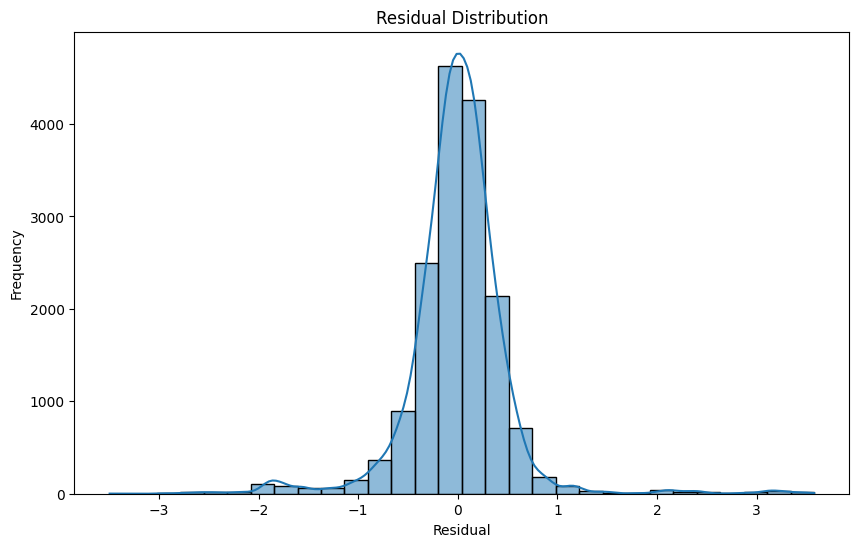

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(pdf["residual"], bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


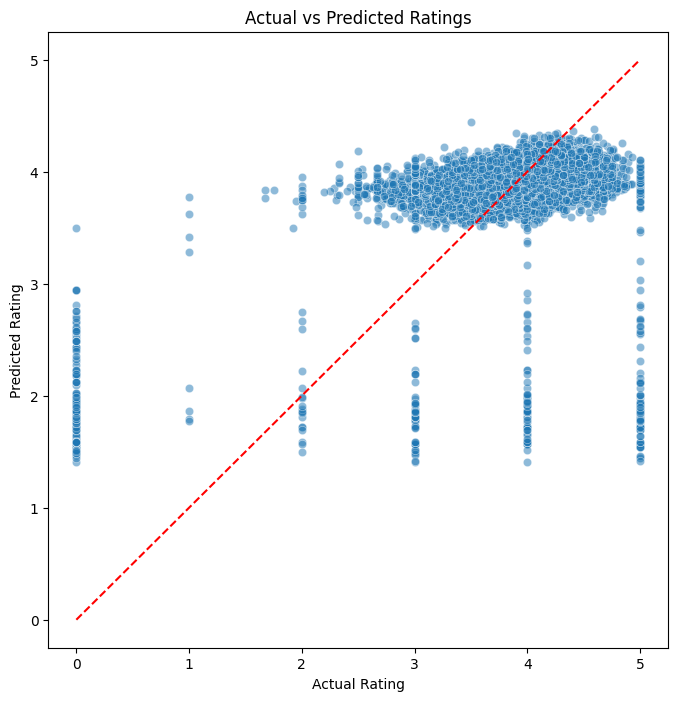

In [19]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=pdf["rating"], y=pdf["prediction"], alpha=0.5)
plt.plot([0,5], [0,5], color='red', linestyle='--')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings")
plt.show()


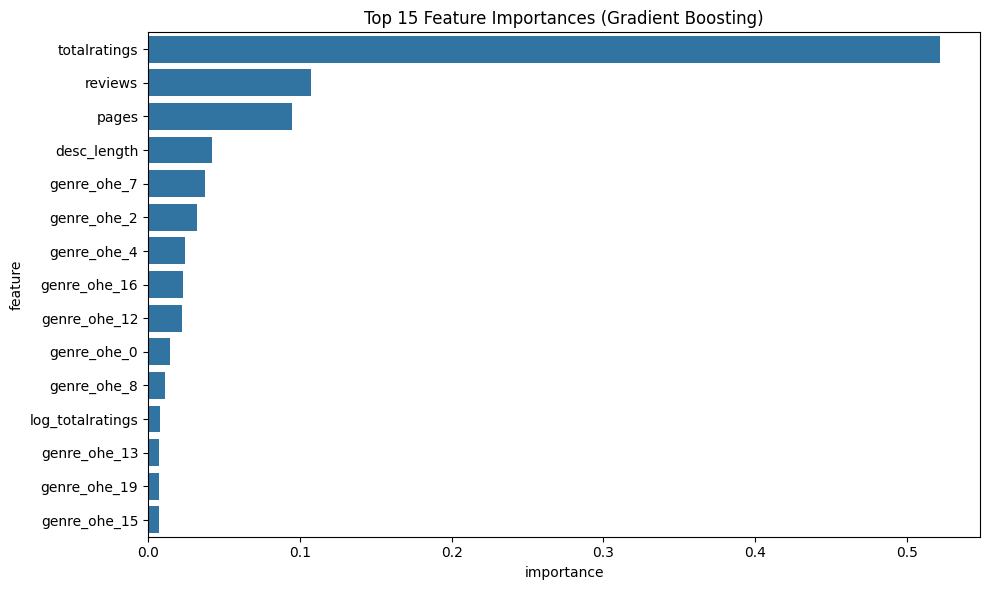

In [20]:
# ============================================================
# 3. FEATURE IMPORTANCE
# ============================================================
if best_name in ["Random Forest", "Gradient Boosting"]:
    importances = best_model.featureImportances.toArray()

    # Retrieve feature names
    num_feats = ["pages", "reviews", "totalratings",
                 "desc_length", "log_reviews", "log_totalratings"]

    # Figure out how many OHE dimensions to add
    ohe_size = len(importances) - len(num_feats)
    feat_names = num_feats + [f"genre_ohe_{i}" for i in range(ohe_size)]

    fi_df = pd.DataFrame({
        "feature": feat_names,
        "importance": importances
    }).sort_values(by="importance", ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(data=fi_df.head(15), x="importance", y="feature")
    plt.title(f"Top 15 Feature Importances ({best_name})")
    plt.tight_layout()
    plt.show()

    fi_df.head(20)
else:
    print("Linear Regression does not provide featureImportances.")


In [21]:
rmse_eval = RegressionEvaluator(labelCol="rating", metricName="rmse")
mae_eval  = RegressionEvaluator(labelCol="rating", metricName="mae")
r2_eval   = RegressionEvaluator(labelCol="rating", metricName="r2")

rmse = rmse_eval.evaluate(best_preds)
mae  = mae_eval.evaluate(best_preds)
r2   = r2_eval.evaluate(best_preds)

print(f"FINAL TEST SCORES ({best_name}):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R2  : {r2:.4f}")


FINAL TEST SCORES (Gradient Boosting):
RMSE: 0.5037
MAE : 0.3185
R2  : 0.3480


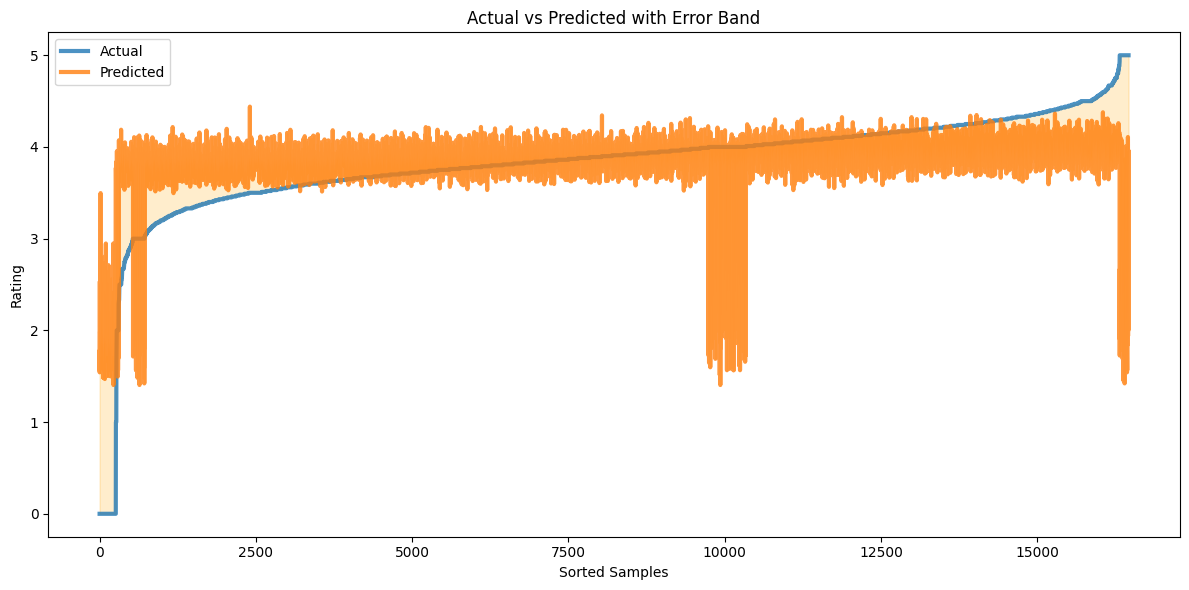

In [22]:
pdf_sorted = pdf.sort_values(by="rating").reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.plot(pdf_sorted["rating"], label="Actual", linewidth=3, alpha=0.8)
plt.plot(pdf_sorted["prediction"], label="Predicted", linewidth=3, alpha=0.8)
plt.fill_between(
    range(len(pdf_sorted)),
    pdf_sorted["rating"],
    pdf_sorted["prediction"],
    color="orange",
    alpha=0.2
)
plt.title("Actual vs Predicted with Error Band")
plt.xlabel("Sorted Samples")
plt.ylabel("Rating")
plt.legend()
plt.tight_layout()
plt.show()


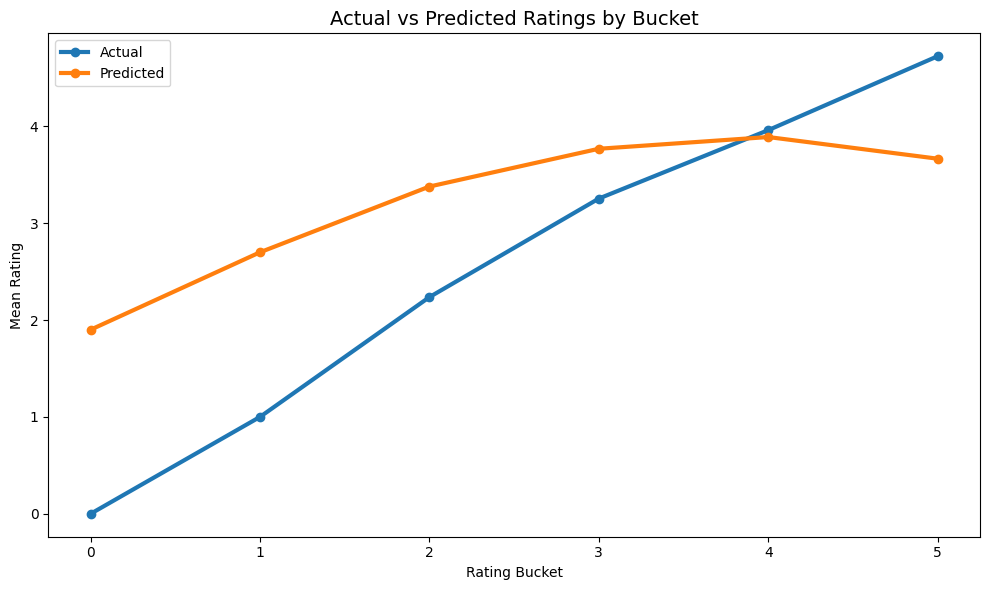

In [23]:
pdf["bucket"] = pdf["rating"].round()

mean_df = pdf.groupby("bucket")[["rating", "prediction"]].mean()

plt.figure(figsize=(10,6))
plt.plot(mean_df.index, mean_df["rating"], marker='o', label="Actual", linewidth=3)
plt.plot(mean_df.index, mean_df["prediction"], marker='o', label="Predicted", linewidth=3)
plt.title("Actual vs Predicted Ratings by Bucket", fontsize=14)
plt.xlabel("Rating Bucket")
plt.ylabel("Mean Rating")
plt.legend()
plt.tight_layout()
plt.show()


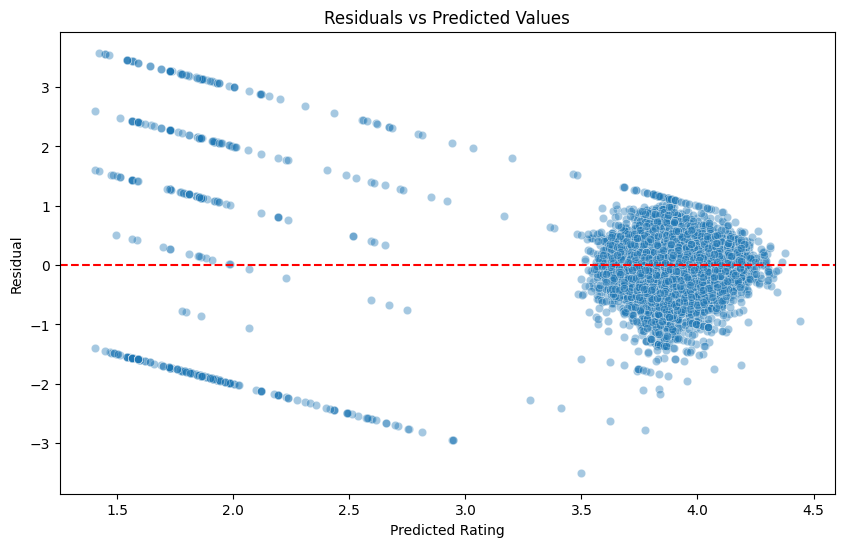

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pdf["prediction"], y=pdf["rating"] - pdf["prediction"], alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Rating")
plt.ylabel("Residual")
plt.show()


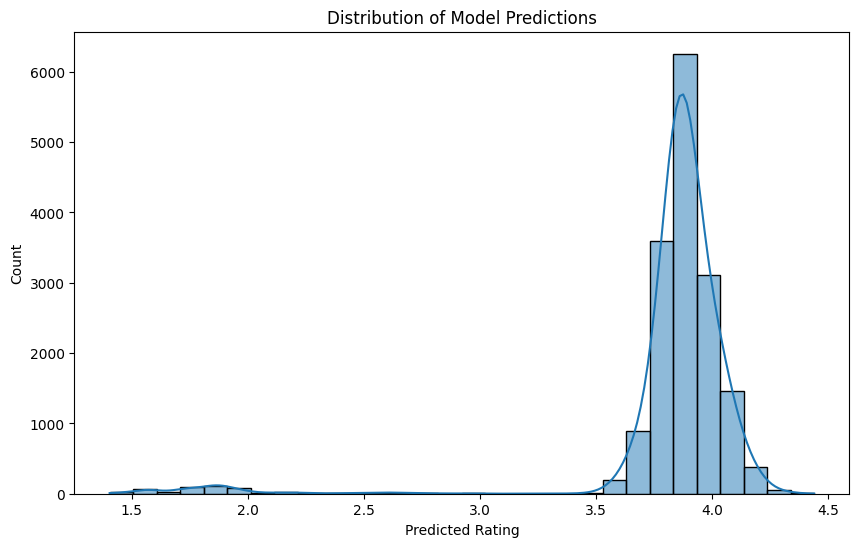

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(pdf["prediction"], kde=True, bins=30)
plt.title("Distribution of Model Predictions")
plt.xlabel("Predicted Rating")
plt.show()


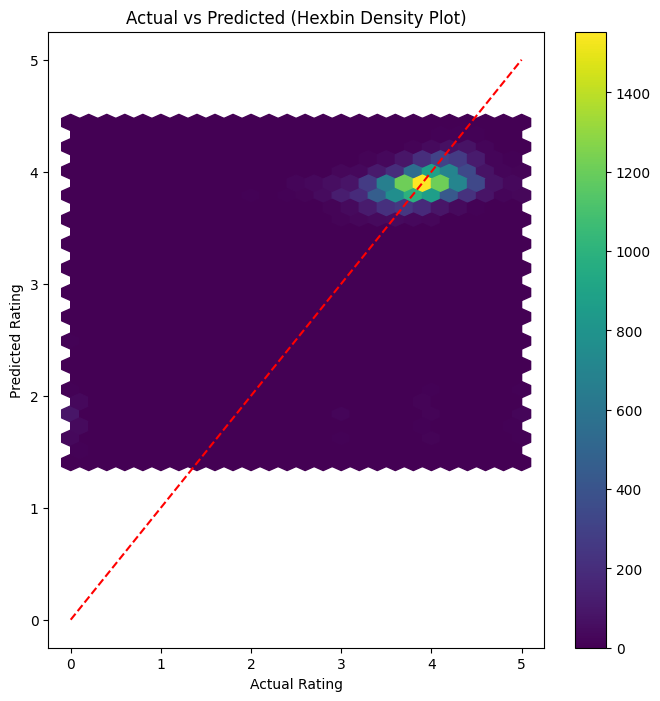

In [26]:
plt.figure(figsize=(8,8))
plt.hexbin(pdf["rating"], pdf["prediction"], gridsize=25, cmap="viridis")
plt.plot([0,5],[0,5], color='red', linestyle='--')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted (Hexbin Density Plot)")
plt.colorbar()
plt.show()


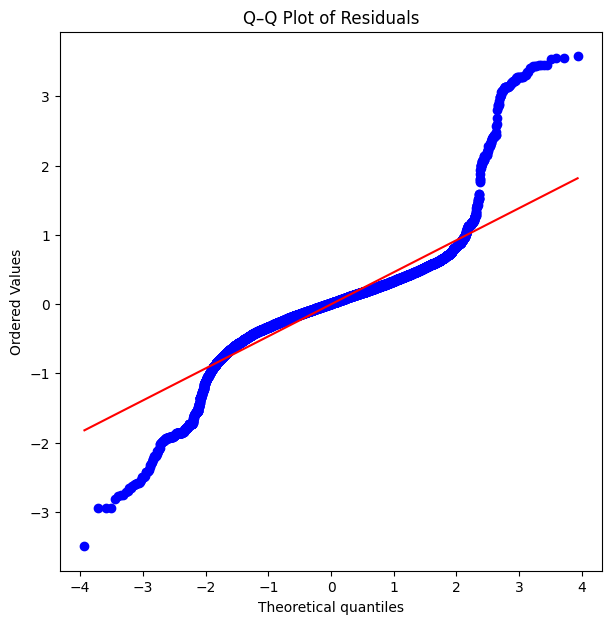

In [27]:
import scipy.stats as stats

plt.figure(figsize=(7,7))
stats.probplot(pdf["rating"] - pdf["prediction"], dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()


In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("GoodReadsML") \
    .getOrCreate()

sc = spark.sparkContext
print("SparkContext alive:", sc)


SparkContext alive: <SparkContext master=local[*] appName=GoodReadsML>


In [8]:
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor

lr = LinearRegression(featuresCol="features", labelCol="rating")

rf = RandomForestRegressor(
    featuresCol="features",
    labelCol="rating",
    numTrees=200
)

gb = GBTRegressor(featuresCol="features", labelCol="rating")


In [14]:
# ============================================================
# 0. IMPORTS
# ============================================================
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ============================================================
# 1. START SPARK & LOAD DATA
# ============================================================
spark = SparkSession.builder.appName("GoodReadsML").getOrCreate()

df = spark.read.csv("GoodReads_100k_books.csv", header=True, inferSchema=True)
print("Loaded rows:", df.count())
print("Columns:", df.columns)


# ============================================================
# 2. CLEANING
# ============================================================
df = df.fillna({"genre": "Unknown", "desc": "No description provided", "title": "Untitled"})

df = df.withColumn("genre", trim(col("genre")))
df = df.withColumn("desc", trim(col("desc")))
df = df.withColumn("title", trim(col("title")))

df = df.withColumn(
    "main_genre",
    when(col("genre") != "Unknown", split(col("genre"), ",")[0]).otherwise("Unknown")
)


# ============================================================
# 3. FEATURE ENGINEERING
# ============================================================
df = df.withColumn("desc_length", length(col("desc")))

# convert numeric fields
num_cols = ["pages", "reviews", "totalratings", "rating"]
for c in num_cols:
    df = df.withColumn(c, col(c).cast("float"))

# log transform
df = df.withColumn("log_reviews", log1p(col("reviews")))
df = df.withColumn("log_totalratings", log1p(col("totalratings")))

# top 20 genres
top_genres = (
    df.groupBy("main_genre").count()
      .orderBy(col("count").desc())
      .limit(20)
      .toPandas()["main_genre"].tolist()
)

df = df.withColumn(
    "main_genre_simplified",
    when(col("main_genre").isin(top_genres), col("main_genre")).otherwise("Other")
)


# ============================================================
# 4. SELECT MODEL FEATURES
# ============================================================
model_cols = [
    "pages", "reviews", "totalratings",
    "desc_length", "log_reviews", "log_totalratings",
    "main_genre_simplified", "rating"
]

df_model = df.select(model_cols).na.drop()


# ============================================================
# 5. PIPELINE: INDEX → OHE → ASSEMBLER
# ============================================================
indexer = StringIndexer(
    inputCol="main_genre_simplified",
    outputCol="genre_index",
    handleInvalid="keep"
)

encoder = OneHotEncoder(
    inputCols=["genre_index"],
    outputCols=["genre_ohe"]
)

assembler = VectorAssembler(
    inputCols=[
        "pages", "reviews", "totalratings",
        "desc_length", "log_reviews", "log_totalratings",
        "genre_ohe"
    ],
    outputCol="features",
    handleInvalid="skip"
)

pipeline = Pipeline(stages=[indexer, encoder, assembler])
pipeline_model = pipeline.fit(df_model)
df_ready = pipeline_model.transform(df_model)

train_ready, test_ready = df_ready.randomSplit([0.8, 0.2], seed=42)


# ============================================================
# 6. DEFINE MODELS
# ============================================================
lr = LinearRegression(featuresCol="features", labelCol="rating")
rf = RandomForestRegressor(featuresCol="features", labelCol="rating")
gb = GBTRegressor(featuresCol="features", labelCol="rating")


# ============================================================
# 7. CROSS-VALIDATION + HYPERPARAMETER TUNING
# ============================================================

evaluator = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="rmse")

# Grids
lr_grid = (ParamGridBuilder()
           .addGrid(lr.regParam, [0.0, 0.1, 0.3])
           .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
           .build())

rf_grid = (ParamGridBuilder()
           .addGrid(rf.numTrees, [50, 100, 200])
           .addGrid(rf.maxDepth, [5, 10])
           .build())

gb_grid = (ParamGridBuilder()
           .addGrid(gb.maxIter, [50, 100])
           .addGrid(gb.maxDepth, [3, 5])
           .build())

# CV objects
cv_lr = CrossValidator(estimator=lr, estimatorParamMaps=lr_grid, evaluator=evaluator,
                       numFolds=3, parallelism=4)
cv_rf = CrossValidator(estimator=rf, estimatorParamMaps=rf_grid, evaluator=evaluator,
                       numFolds=3, parallelism=4)
cv_gb = CrossValidator(estimator=gb, estimatorParamMaps=gb_grid, evaluator=evaluator,
                       numFolds=3, parallelism=4)

print("Training CV models...")
cv_lr_model = cv_lr.fit(train_ready)
cv_rf_model = cv_rf.fit(train_ready)
cv_gb_model = cv_gb.fit(train_ready)


# ============================================================
# 8. TEST SET PERFORMANCE (RMSE)
# ============================================================
def get_rmse(model, name):
    rms = evaluator.evaluate(model.transform(test_ready))
    print(f"{name} RMSE = {rms:.4f}")
    return rms

rmse_lr = get_rmse(cv_lr_model, "Linear Regression (CV)")
rmse_rf = get_rmse(cv_rf_model, "Random Forest (CV)")
rmse_gb = get_rmse(cv_gb_model, "Gradient Boosting (CV)")

rmse_scores = {
    "Linear Regression": rmse_lr,
    "Random Forest": rmse_rf,
    "Gradient Boosting": rmse_gb
}

# Spark-safe best model selection
best_name = None
best_rmse = float("inf")
for name, score in rmse_scores.items():
    if score < best_rmse:
        best_rmse = score
        best_name = name

print(f"\n BEST MODEL: {best_name}  (RMSE = {best_rmse:.4f})")

# get best model object
best_model = {
    "Linear Regression": cv_lr_model.bestModel,
    "Random Forest": cv_rf_model.bestModel,
    "Gradient Boosting": cv_gb_model.bestModel
}[best_name]

print("\n🔧 BEST MODEL HYPERPARAMETERS:")
print(best_model.extractParamMap())


Loaded rows: 106253
Columns: ['author', 'bookformat', 'desc', 'genre', 'img', 'isbn', 'isbn13', 'link', 'pages', 'rating', 'reviews', 'title', 'totalratings']
Training CV models...
Linear Regression (CV) RMSE = 0.5683
Random Forest (CV) RMSE = 0.5058
Gradient Boosting (CV) RMSE = 0.5041

🏆 BEST MODEL: Gradient Boosting  (RMSE = 0.5041)

🔧 BEST MODEL HYPERPARAMETERS:
{Param(parent='GBTRegressor_2264f884246a', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False, Param(parent='GBTRegressor_2264f884246a', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint

In [47]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluators
evaluator_rmse = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="rmse")
evaluator_mae  = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="mae")
evaluator_r2   = RegressionEvaluator(labelCol="rating", predictionCol="prediction", metricName="r2")

def evaluate_on_test(model, model_name):
    preds = model.transform(test_df)
    rmse = evaluator_rmse.evaluate(preds)
    mae  = evaluator_mae.evaluate(preds)
    r2   = evaluator_r2.evaluate(preds)

    return {
        "Model": model_name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

results = []
results.append(evaluate_on_test(lr_model, "Linear Regression"))
results.append(evaluate_on_test(rf_model, "Random Forest"))
results.append(evaluate_on_test(gb_model, "Gradient Boosting"))

import pandas as pd
pd.DataFrame(results)


Model      RMSE       MAE        R2
0  Linear Regression  0.568324  0.351189  0.169885
1      Random Forest  0.510295  0.329979  0.330750
2  Gradient Boosting  0.374390  0.273688  0.639757

In [43]:
# ============================================================
# SINGLE PREDICTION — DEMO OF DEPLOYMENT
# ============================================================

# Take one random row from the dataset
sample = df_model.limit(1)

# Apply preprocessing pipeline
sample_ready = pipeline_model.transform(sample)

# Predict using the BEST MODEL
prediction = best_model.transform(sample_ready)

prediction.select("rating", "prediction").show()


+------+------------------+
|rating|        prediction|
+------+------------------+
|  3.52|3.8911507093767663|
+------+------------------+



In [ ]:
from getpass import getpass
token = getpass('Enter your GitHub token: ')


In [44]:
# ============================================================
# SAVE BEST MODEL + PIPELINE MODEL
# ============================================================

best_model.save("best_model_spark")
pipeline_model.save("preprocessing_pipeline")
print("Models saved successfully!")


Models saved successfully!
